# Analyse Exploratoire

### Import des modules

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:

pip install seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#### Chargement des données

In [ ]:
#building_consumption = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
building_consumption = pd.read_csv('https://raw.githubusercontent.com/IngridFi70/Projet06/main/2016_Building_Energy_Benchmarking.csv')

In [ ]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

In [ ]:
print('lignes et colonnes :', building_consumption.shape)

#### Analyse des données manquantes

In [ ]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

La colonne **Comments** est vide, elle peut être supprimée.
La colonne **YearsENERGYSTARCertified** est trop peu renseignée, elle peut être supprimée.


In [ ]:
# suppression des colonnes Comments et YearsENERGYSTARCertified
print('lignes et colonnes AVANT modif :', building_consumption.shape)
building_consumption_clean=building_consumption.drop(columns=['Comments','YearsENERGYSTARCertified'])
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

In [ ]:
building_consumption_clean.describe(include='object')

In [ ]:
building_consumption_clean.describe(include='bool')

In [ ]:
building_consumption_clean.describe(include='float64')

In [ ]:
building_consumption_clean.describe(include='int64')

les colonnes City, State et DataYear sont non pertinentes car elles répètent la même information à toutes les lignes.

In [ ]:
# suppression des colonnes City et State
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean=building_consumption_clean.drop(columns=['City', 'State','DataYear'])
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

In [ ]:
liste_colonnes_total = building_consumption_clean.columns
liste_colonnes_total

In [ ]:
for colonne in liste_colonnes_total:
    print(building_consumption_clean[colonne].value_counts(dropna=False))
    print("_____________________________________")

Un bâtiment comporte 99 étages alors que la plus haute tour de Seattle en a 76.

In [ ]:
# suppression du bâtiment de 99 étages
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean = building_consumption_clean[building_consumption_clean['NumberofFloors'] != 99]
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

L'étude porte sur les bâtiments non destinés à l'habitation. Il faut donc exclure les lignes concernant des habitations.

In [ ]:
# Analyse de la colonne BuildingType
print(building_consumption_clean['BuildingType'].value_counts(dropna=False))

On peut exclure les bâtiments des 4 types suivants : Multifamily LR (1-4), Multifamily MR (5-9), Multifamily HR (10+), Campus

In [ ]:
# suppression des 4 types de bâtiments
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean = building_consumption_clean[
    ~building_consumption_clean['BuildingType'].isin([
        'Multifamily LR (1-4)',
        'Multifamily MR (5-9)',
        'Multifamily HR (10+)',
        'Campus'
    ])]
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

Intéressons-nous maintenant à l'utilisation 'première' des bâtiments (PrimaryPropertyType), afin de vérifier qu'ils ne servent pas d'habitation.

In [ ]:
# Analyse de la colonne PrimaryPropertyType
print(building_consumption_clean['PrimaryPropertyType'].value_counts(dropna=False))

Les utilisations suivantes sont à exclure : Hotel, Residence Hall, Senior Care Community, Hospital, Low-Rise Multifamily

In [ ]:
# suppression des utilisations résidentielles
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean = building_consumption_clean[
    ~building_consumption_clean['PrimaryPropertyType'].isin([
        'Hotel',
        'Residence Hall',
        'Senior Care Community',
        'Hospital',
        'Low-Rise Multifamily'
    ])]
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

In [ ]:
# Vérification de la colonne PrimaryPropertyType
print(building_consumption_clean['PrimaryPropertyType'].value_counts(dropna=False))

Intéressons-nous maintenant à l'utilisation principale, secondaire et tertiaire des bâtiments, afin de vérifier qu'ils ne servent pas d'habitation.

In [ ]:
# Analyse de la colonne LargestPropertyUseType
print(building_consumption_clean['LargestPropertyUseType'].value_counts(dropna=False))

Les 11 utilisations suivantes sont à exclure : 
Hotel, Residence Hall/Dormitory , Senior Care Community , Multifamily Housing, 
Hospital (General Medical & Surgical), Other - Lodging/Residential, Urgent Care/Clinic/Other Outpatient, 
Other/Specialty Hospital , Prison/Incarceration , Lifestyle Center , Residential Care Facility

In [ ]:
# suppression des 11 catégories d'utilisation
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)

liste_exclude = ['Hotel',
                 'Residence Hall/Dormitory',
                 'Senior Care Community' ,
                 'Multifamily Housing',
                 'Hospital (General Medical & Surgical)',
                 'Other - Lodging/Residential',
                 'Urgent Care/Clinic/Other Outpatient',
                 'Other/Specialty Hospital' ,
                 'Prison/Incarceration' ,
                 'Lifestyle Center' ,
                 'Residential Care Facility']

building_consumption_clean = building_consumption_clean[~building_consumption_clean['LargestPropertyUseType'].isin(liste_exclude)]
building_consumption_clean = building_consumption_clean[~building_consumption_clean['SecondLargestPropertyUseType'].isin(liste_exclude)]
building_consumption_clean = building_consumption_clean[~building_consumption_clean['ThirdLargestPropertyUseType'].isin(liste_exclude)]

print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

In [ ]:
# Vérification des la colonnes LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType
print(building_consumption_clean['LargestPropertyUseType'].value_counts(dropna=False))
print(building_consumption_clean['SecondLargestPropertyUseType'].value_counts(dropna=False))
print(building_consumption_clean['ThirdLargestPropertyUseType'].value_counts(dropna=False))

In [ ]:
building_consumption_clean.describe(include='int64')

In [ ]:
print(building_consumption_clean.describe(include='float64'))

#### Analyse du nombre de bâtiments

In [ ]:
print(building_consumption_clean['NumberofBuildings'].value_counts(dropna=False))

46 propriétés sont indiquées avec 0 bâtiment et 2 ne sont pas renseignées.

In [ ]:
# recherche des 48 propriétés pour lesquelles le nombre de bâtiments n'est pas clair
strange_nb_buildings = building_consumption_clean[
    (building_consumption_clean['NumberofBuildings'] == 0) |
    (building_consumption_clean['NumberofBuildings'].isna())
]
print(strange_nb_buildings['NumberofBuildings'].value_counts(dropna=False))

In [ ]:
print(building_consumption_clean[building_consumption_clean['NumberofBuildings'].isna()])

In [ ]:
print(building_consumption_clean.loc[578])
print(building_consumption_clean.loc[2670])

Les deux propriétés dont le nombre de bâtiments n'est pas indiqué comportent beaucoup de données manquantes et peuvent être exclues.

In [ ]:
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean.drop([578,2670], inplace=True)
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

In [ ]:
print(building_consumption_clean[building_consumption_clean['NumberofBuildings']== 0])

In [ ]:
print(building_consumption_clean.loc[417])

La majorité des propriétés indiquant 0 bâtiment ont une seule adresse, ce qui laisse penser qu'elles comportent un seul bâtiment.

In [ ]:
# remplacer le nombre de bâtiments indiquant 0 par 1
building_consumption_clean.loc[building_consumption_clean['NumberofBuildings'] == 0, 'NumberofBuildings'] = 1
print(building_consumption_clean['NumberofBuildings'].value_counts(dropna=False))

#### Analyse des sources d'énergie

Le dataset comporte des données de consommation énergétiques ajustées sur 30 ans de conditions météo moyennes. Nous pouvons les exclure puisque nous avons des données pour une seule année, ce qui signifie que les consommations de chaque bâtiment sont calculées sur la même base : la météo de 2016.

In [ ]:
# Suppression des colonnes de type WN (Weather Normalized)
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean=building_consumption_clean.drop(columns=['SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)'])
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

Les consommations d'électricité et de gaz sont les deux seules données qui ne sont pas exprimées qu'en kBtu (kilo British thermal units). Les autres unités de mesure ne sont pas pertinentes puisqu'on ne peut les comparer à aucune autre donnée de consommation.

In [ ]:
# Suppression des colonnes exprimant des consommations énergétiques autrement qu'en kBtu
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean=building_consumption_clean.drop(columns=['Electricity(kWh)', 'NaturalGas(therms)'])
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

Analysons les données énergétiques afin d'exclure les valeurs aberrantes.

In [ ]:
building_consumption_clean.describe()

Les bâtiments avec des consommations négatives d'électricité sont à exclure.

In [ ]:
# suppression des bâtiments avec conso électrique négative
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean = building_consumption_clean[building_consumption_clean['Electricity(kBtu)'] >= 0]
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

Puisque les consommations par type d'énergie sont une composante de l'énergie consommée totale (c'est-à-dire la cible), nous devons les prendre en compte en proportion de la consommation totale afin de calculer l'incidence de chaque type d'énergie sur la consommation totale. Les consommations par type d'énergie peuvent ensuite être exclues du dataset.

In [ ]:
# Ajout des ratios par source d'énergie dans la consommation totale d'énergie puis suppression des consommations par énergie
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean['ratio_steam'] = building_consumption_clean['SteamUse(kBtu)'] / building_consumption_clean['SiteEnergyUse(kBtu)']
building_consumption_clean['ratio_electricity'] = building_consumption_clean['Electricity(kBtu)'] / building_consumption_clean['SiteEnergyUse(kBtu)']
building_consumption_clean['ratio_gas'] = building_consumption_clean['NaturalGas(kBtu)'] / building_consumption_clean['SiteEnergyUse(kBtu)']
building_consumption_clean=building_consumption_clean.drop(columns=['SteamUse(kBtu)', 'Electricity(kBtu)','NaturalGas(kBtu)'])
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

#### Choix des cibles

La cible pour la prédiction de la consommation totale d'énergie sera : **SiteEnergyUse(kBtu)**

La cible pour la prédiction des émissions de CO2 sera : **TotalGHGEmissions**

### Recherche d'outliers

Le dataset comporte une colonne Outlier, vérifions quel outlier peuvent être écartés.

In [ ]:
# Analyse des bâtiments marqués comme outliers
check_outliers=building_consumption_clean[building_consumption_clean['Outlier'].notna()]
check_normal = building_consumption_clean[building_consumption_clean['Outlier'].isna()]
check_normal.describe()


In [ ]:
check_outliers.describe()

In [ ]:
check_outliers.head(100)

Pas d'abbération visible.

In [95]:
building_consumption_clean['SiteEnergyUse(kBtu)'].value_counts()

SiteEnergyUse(kBtu)
8.470978e+05    1
2.615974e+06    1
1.150804e+07    1
4.374646e+06    1
2.178074e+06    1
               ..
4.991894e+06    1
1.876077e+07    1
1.399864e+07    1
1.325973e+06    1
3.936412e+07    1
Name: count, Length: 1438, dtype: int64

In [96]:
building_consumption_clean['SiteEnergyUse(kBtu)'].min()

np.float64(16808.90039)

In [97]:
building_consumption_clean['SiteEnergyUse(kBtu)'].describe()

count    1.438000e+03
mean     6.207325e+06
std      1.221443e+07
min      1.680890e+04
25%      1.166171e+06
50%      2.342783e+06
75%      6.194984e+06
max      2.746822e+08
Name: SiteEnergyUse(kBtu), dtype: float64

La consommation d'énergie des bâtiments semble très disparate. On peut déjà exclure les bâtiments sans consommation énergétique.

In [98]:
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean=building_consumption_clean[building_consumption_clean['SiteEnergyUse(kBtu)']!=(0)]
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

lignes et colonnes AVANT modif : (1438, 36)
lignes et colonnes APRES modif : (1438, 36)


#### Recherche d'outliers avec la méthode de l'IQR

In [106]:
data = building_consumption_clean['SiteEnergyUse(kBtu)']

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

low_bound = Q1 - 1.5 * IQR
up_bound = Q3 + 1.5 * IQR

# Filtrer les données sans outliers
data_outliers_IQR = building_consumption_clean[
    (data < low_bound) | (data > up_bound)
]
print(f"{len(data_outliers_IQR)} bâtiments sur {len(building_consumption_clean)} sont identifiés comme outliers avec la méthode IQR")

167 bâtiments sur 1438 sont identifiés comme outliers avec la méthode IQR


#### Recherche d'outliers avec la méthode du z-score

In [107]:
# Recherche d'outliers la consommation totale avec la méthode du z-score
df = building_consumption_clean
EU = 'SiteEnergyUse(kBtu)'
df['z_scoreEU'] = (df[EU] - df[EU].mean()) / df[EU].std()
data_outliers_zscore = building_consumption_clean[
    (df['z_scoreEU']>=3)
]
print(f" {len(data_outliers_zscore)} bâtiments sur {len(building_consumption_clean)} sont identifiés comme outliers avec la méthode z-score")


 30 bâtiments sur 1438 sont identifiés comme outliers avec la méthode z-score


On va marquer les lignes qui sont identifiées comme outliers.

In [101]:
building_consumption_clean['outlier_EU']=False

In [109]:
# propriétés outliers EU
outliers1 = data_outliers_IQR['OSEBuildingID'].unique()
outliers2 = data_outliers_zscore['OSEBuildingID'].unique()

# marquer les outliers EU dans le dataset
building_consumption_clean.loc[(building_consumption_clean['OSEBuildingID'].isin(outliers1))|(building_consumption_clean['OSEBuildingID'].isin(outliers2)), 'outlier_EU'] = True

In [112]:
building_consumption_clean.tail()

OSEBuildingID    BuildingType PrimaryPropertyType  \
3322          50039  NonResidential               Other   
3317          50031  NonResidential        Large Office   
3324          50045  NonResidential        Large Office   
3347          50081  NonResidential         K-12 School   
3356          50094  NonResidential  Mixed Use Property   

                            PropertyName                 Address  ZipCode  \
3322  Honda of Seattle/Toyota of Seattle  2005 Airport Way South  98134.0   
3317                      Dexter Station     1101 Dexter Ave. N.  98109.0   
3324                      Sidneysea, LLC    400 9th Avenue North  98109.0   
3347              Hamlin Robinson School     1701 20th Ave South  98144.0   
3356                                AIBS     601 Westlake Ave N.  98109.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
3322                    7666203255                    2   
3317                    2249500265                    7   
3324                    1983200035                    7   
3347                    7548300840                    3   
3356                    4088803385                    7   

               Neighborhood  Latitude  ...  DefaultData  ComplianceStatus  \
3322       GREATER DUWAMISH  47.58542  ...        False         Compliant   
3317  MAGNOLIA / QUEEN ANNE  47.62906  ...        False         Compliant   
3324             LAKE UNION  47.62263  ...        False         Compliant   
3347       GREATER DUWAMISH  47.58831  ...        False         Compliant   
3356             LAKE UNION  47.62497  ...        False         Compliant   

      Outlier  TotalGHGEmissions  GHGEmissionsIntensity  ratio_steam  \
3322      NaN              91.98                   0.85          0.0   
3317      NaN             214.19                   0.42          0.0   
3324      NaN             202.12                   0.42          0.0   
3347      NaN               9.24                   0.21          0.0   
3356      NaN            1000.06                   2.90          0.0   

      ratio_electricity ratio_gas z_scoreEU  outlier_EU  
3322           0.751726  0.248274 -0.099508       False  
3317           0.903647  0.096353  1.027755        True  
3324           0.838154  0.161846  0.637878        True  
3347           1.000000  0.000000 -0.399638       False  
3356           0.600466  0.399534  2.714559        True  

[5 rows x 38 columns]

# DRAFTS

La distribution par tranche de consommation peut aider à mettre en évidence des outliers.

In [ ]:
sns.kdeplot(building_consumption_clean['SiteEnergyUse(kBtu)'], shade=False)
plt.title("Estimation de la densité (KDE)")
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(building_consumption_clean['SiteEnergyUse(kBtu)'], bins=38)
plt.title("Histogramme de la donnée")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.boxplot(x=building_consumption_clean['SiteEnergyUse(kBtu)'])
plt.title("Boxplot de la donnée")
plt.show()

In [ ]:
# Création d'une colonne catégorielle à partir de la consommation totale d'énergie
building_consumption_clean['cat_EU'] = pd.cut(building_consumption_clean['SiteEnergyUse(kBtu)'], bins=12, include_lowest=True, precision=0)

# Comptage du nombre de valeurs dans chaque catégorie
count_cat_EU = building_consumption_clean['cat_EU'].value_counts().sort_index()

print(count_cat_EU)

In [ ]:
# Représentation graphique
plt.figure(figsize=(12, 8))
count_cat_EU.plot(kind='line')
plt.title("Répartition par catégories créées")
plt.xlabel("Catégories (intervalles)")
plt.ylabel("Nombre de valeurs")
plt.xticks(rotation=90)
plt.show()

La consommation devient très atypique à partir de 247215668.09. On peut exclure les bâtiments à partir de cette EU.

In [ ]:
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean = building_consumption_clean[
    building_consumption_clean['SiteEnergyUse(kBtu)'] < 247215668.09]
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

In [ ]:
# Création d'une colonne catégorielle à partir de la consommation totale d'énergie
building_consumption_clean['cat_EU'] = pd.cut(building_consumption_clean['SiteEnergyUse(kBtu)'], bins=5)

# Comptage du nombre de valeurs dans chaque catégorie
count_cat_EU = building_consumption_clean['cat_EU'].value_counts().sort_index()

count_cat_EU

In [ ]:
# Représentation graphique
count_cat_EU.plot(kind='bar')
plt.title("Répartition par catégories créées")
plt.xlabel("Catégories (intervalles)")
plt.ylabel("Nombre de valeurs")
plt.show()

In [ ]:
building_consumption_clean.columns

In [ ]:
building_consumption_clean['SiteEnergyUse(kBtu)'].describe()

Regardons la distribution par EUI

In [ ]:
building_consumption_clean['SiteEUI(kBtu/sf)'].describe()

In [ ]:
# Création d'une colonne catégorielle à partir de la consommation énergétique par sf
building_consumption_clean['cat_EUI'] = pd.cut(building_consumption_clean['SiteEUI(kBtu/sf)'], bins=10)

# Comptage du nombre de valeurs dans chaque catégorie
count_cat_EUI = building_consumption_clean['cat_EUI'].value_counts().sort_index()

count_cat_EUI

In [ ]:
# Représentation graphique
count_cat_EUI.plot(kind='bar')
plt.title("Répartition par catégories créées")
plt.xlabel("Catégories (intervalles)")
plt.ylabel("Nombre de valeurs")
plt.show()

Ici encore, les valeurs deviennent atypiques à partir de 667,66. On peut exclure les bâtiments à partir de cette EUI.

In [ ]:
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean= building_consumption_clean[
    building_consumption_clean['SiteEUI(kBtu/sf)']< 667.66 ]
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

Analysons la distribution des surfaces des bâtiments

In [ ]:
building_consumption_clean['PropertyGFABuilding(s)'].describe()

In [ ]:
# Création d'une colonne catégorielle à partir de la surface bâtiment
building_consumption_clean['cat_sfb'] = pd.cut(building_consumption_clean['PropertyGFABuilding(s)'], bins=2, include_lowest=True)

# Comptage du nombre de valeurs dans chaque catégorie
count_cat_sfb = building_consumption_clean['cat_sfb'].value_counts().sort_index()

count_cat_sfb



In [ ]:
# Représentation graphique
count_cat_sfb.plot(kind='bar')
plt.title("Répartition par catégories créées")
plt.xlabel("Catégories (intervalles)")
plt.ylabel("Nombre de valeurs")
plt.show()

Analysons la distribution des surfaces totales

In [ ]:
building_consumption_clean['PropertyGFATotal'].describe()


In [ ]:
# Création d'une colonne catégorielle à partir de la surface totale
building_consumption_clean['cat_sf'] = pd.cut(building_consumption_clean['PropertyGFATotal'], bins=2)

# Comptage du nombre de valeurs dans chaque catégorie
count_cat_sf = building_consumption_clean['cat_sf'].value_counts().sort_index()

count_cat_sf


In [ ]:
# Représentation graphique
count_cat_sf.plot(kind='bar')
plt.title("Répartition par catégories créées")
plt.xlabel("Catégories (intervalles)")
plt.ylabel("Nombre de valeurs")
plt.show()

# Recherche de corrélation entre les données

## Corrélation avec la cible

In [113]:
building_consumption_clean.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'ZipCode', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'DefaultData',
       'ComplianceStatus', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'ratio_steam', 'ratio_electricity',
       'ratio_gas', 'z_scoreEU', 'outlier_EU'],
      dtype='object')

In [117]:
# Liste des données qualitatives
liste_quali=('BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType', 'YearBuilt', 'outlier_EU')
liste_quali

('BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'LargestPropertyUseType',
 'YearBuilt',
 'outlier_EU')

In [118]:
# Liste des données quantitatives
liste_quanti=('Latitude', 'Longitude','NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ENERGYSTARScore', 
       'SourceEUI(kBtu/sf)', 'ratio_steam',
       'ratio_electricity', 'ratio_gas', 'YearBuilt', 'SiteEnergyUse(kBtu)','TotalGHGEmissions',
       'GHGEmissionsIntensity')
liste_quanti

('Latitude',
 'Longitude',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ENERGYSTARScore',
 'SourceEUI(kBtu/sf)',
 'ratio_steam',
 'ratio_electricity',
 'ratio_gas',
 'YearBuilt',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity')

### Variables qualitatives

Analysons les corrélations entre la consommation et les données qualitatives.

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 36.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 80.2% of the points cannot be placed; you may want to decrease the size of the markers or use s

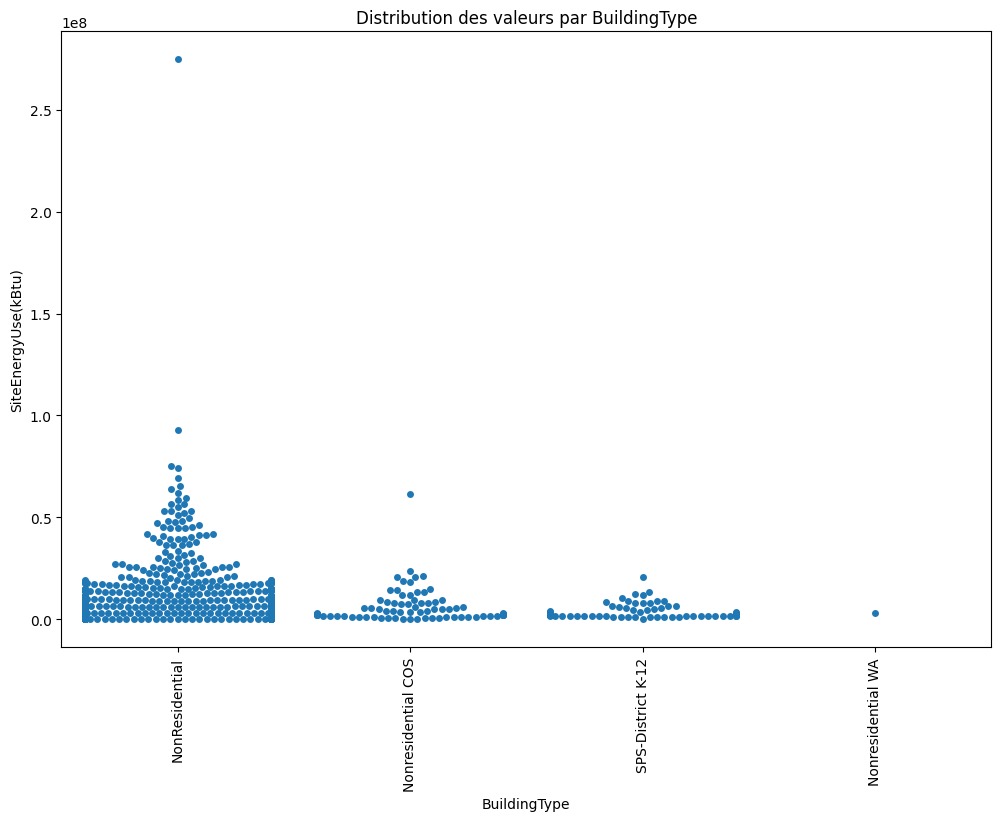

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 77.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 87.1% of the points cannot be placed; you may want to decrease the size of the markers or use s

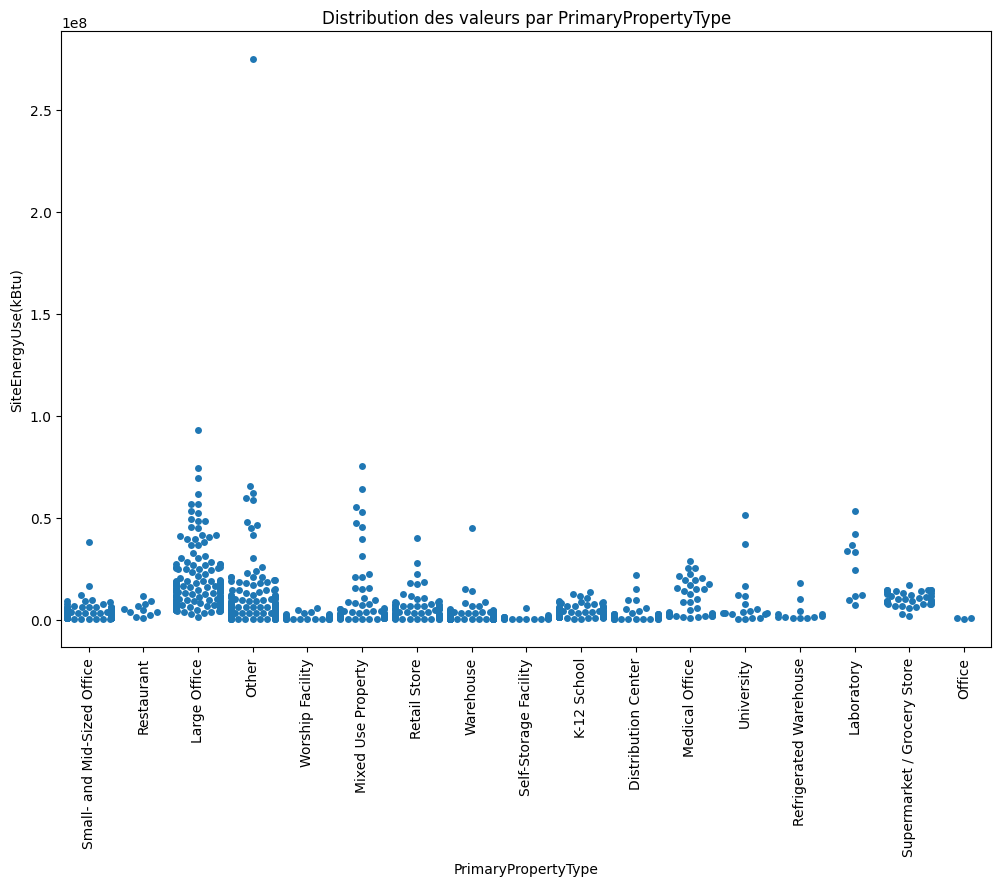

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 74.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 89.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 65.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 67.4% of the points cannot be placed; you may want to decrease the size of the markers or use s

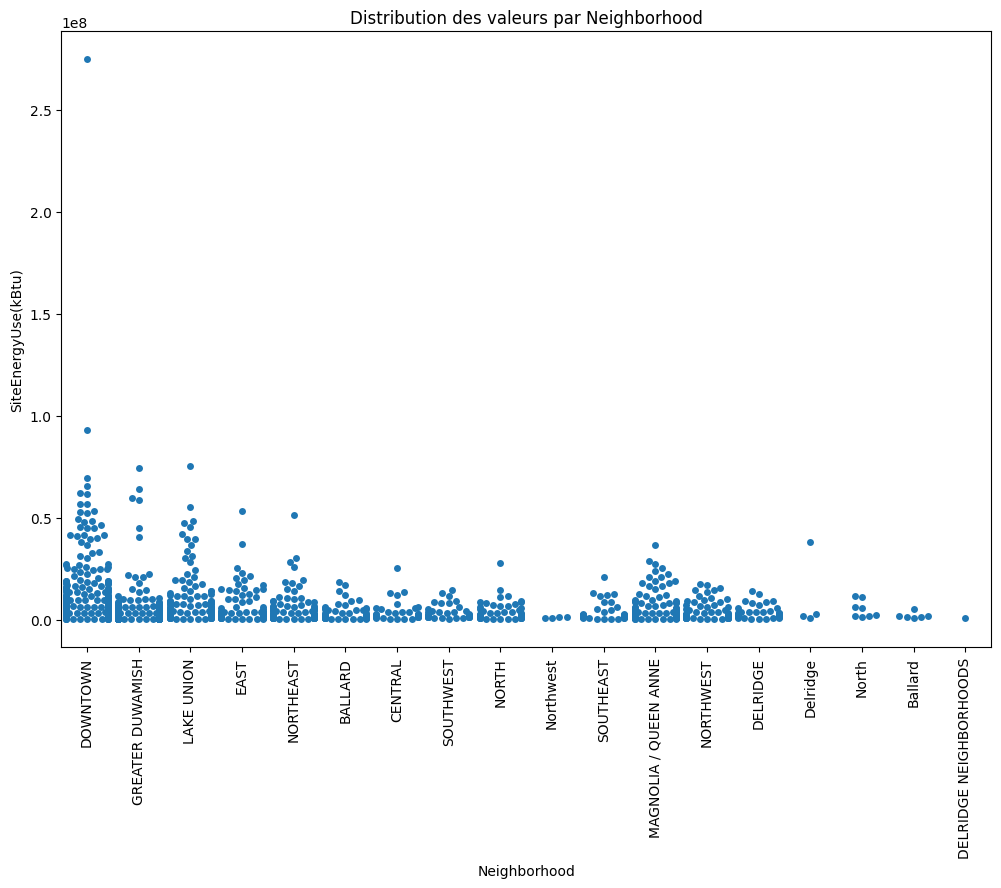

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 90.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 92.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 82.8% of the points cannot be placed; you may want to decrease the size of the markers or use s

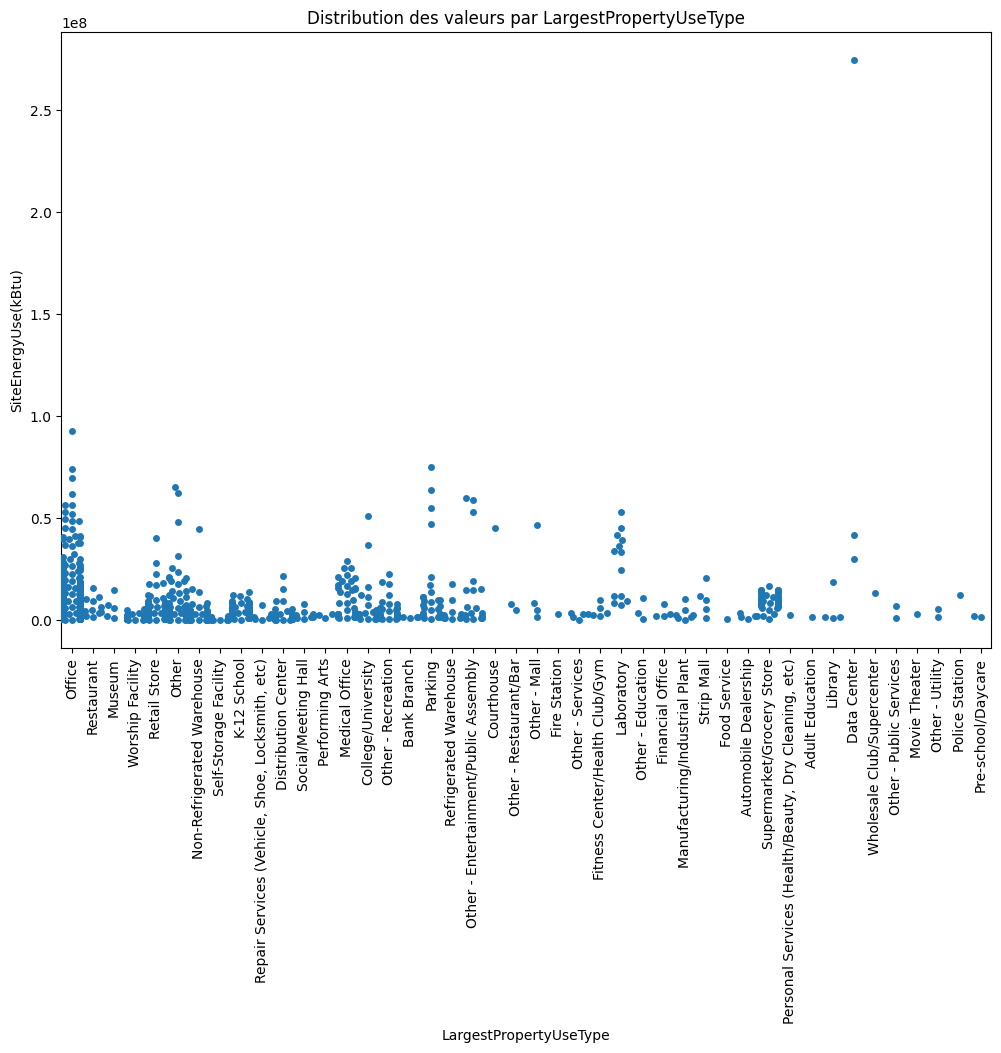

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 92.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use s

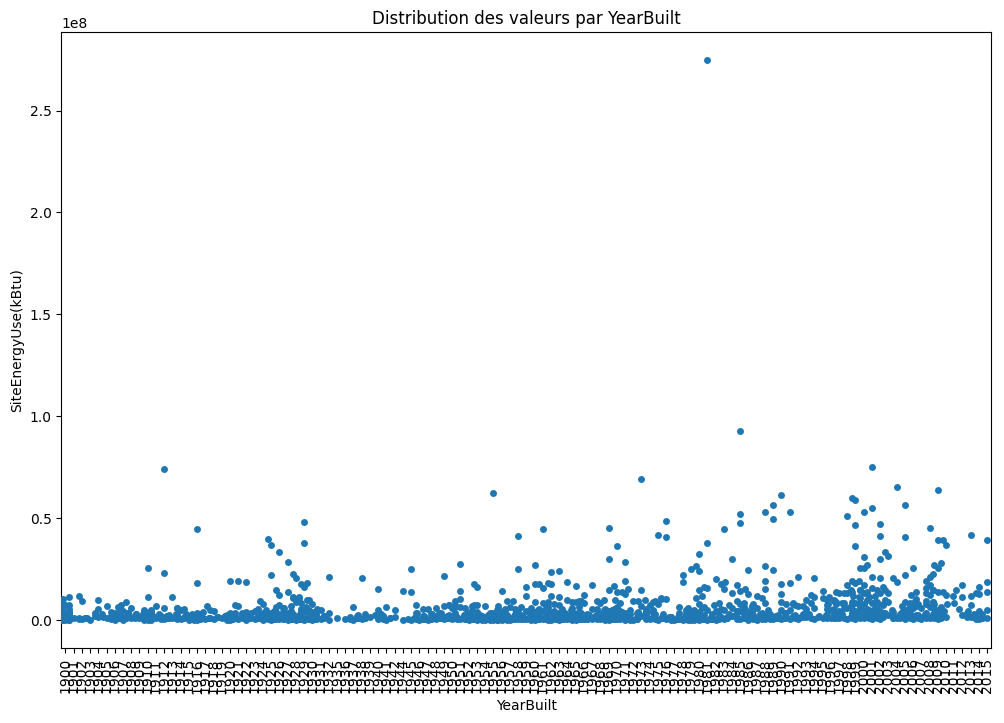

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 81.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


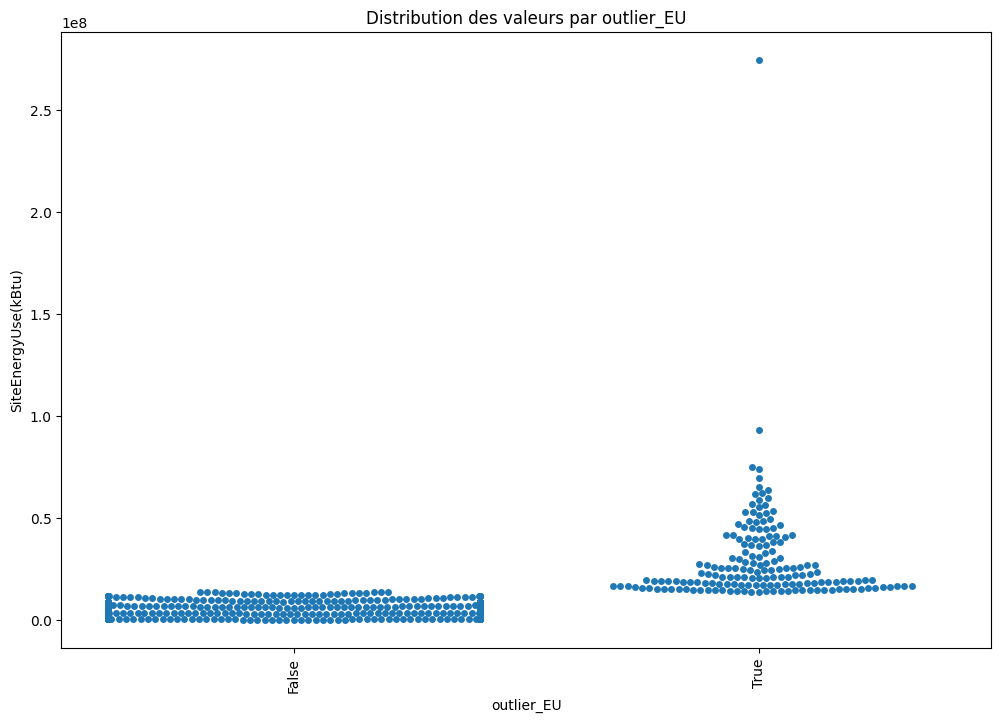

In [120]:
for quali in liste_quali :
    plt.figure(figsize=(12, 8))
    sns.swarmplot(x=quali, y='SiteEnergyUse(kBtu)', data=building_consumption_clean)
    plt.title("Distribution des valeurs par "+ quali)
    plt.xticks(rotation=90)
    plt.show()

L'utilisation Data Center est très remarquable dans la consommation d'énergie. On pourra ajouter une colonne de type booléen pour indiquer si la propriété sert de data center ou non. On peut faire de même avec l'utilisation Laboratory.

### Variables quantitatives

Analysons les corrélations entre la consommation et les données quantitatives.

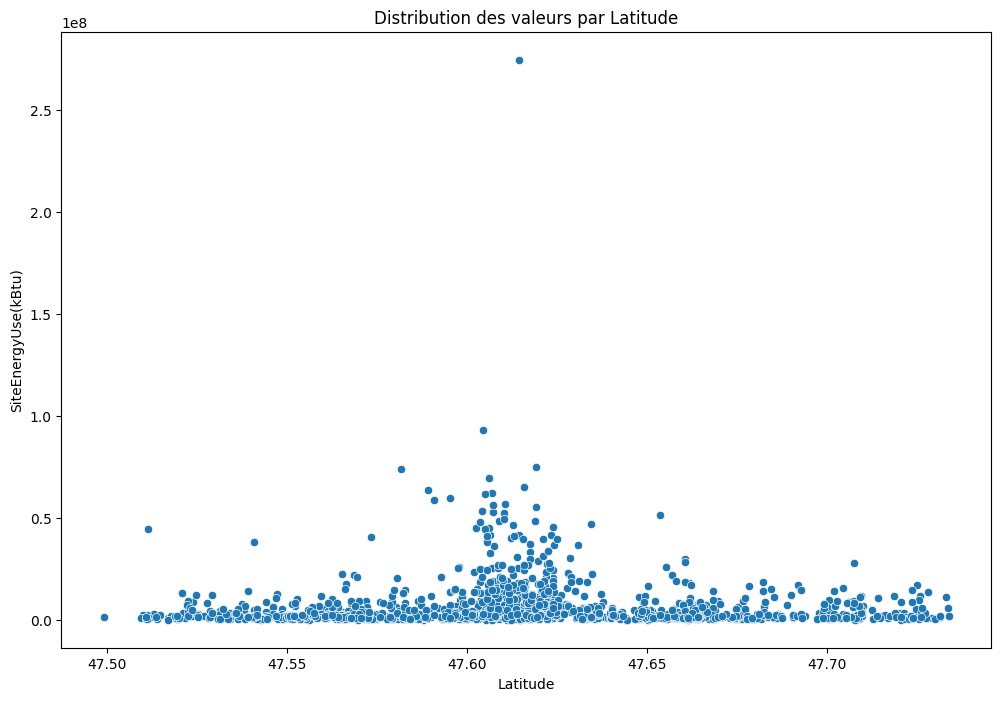

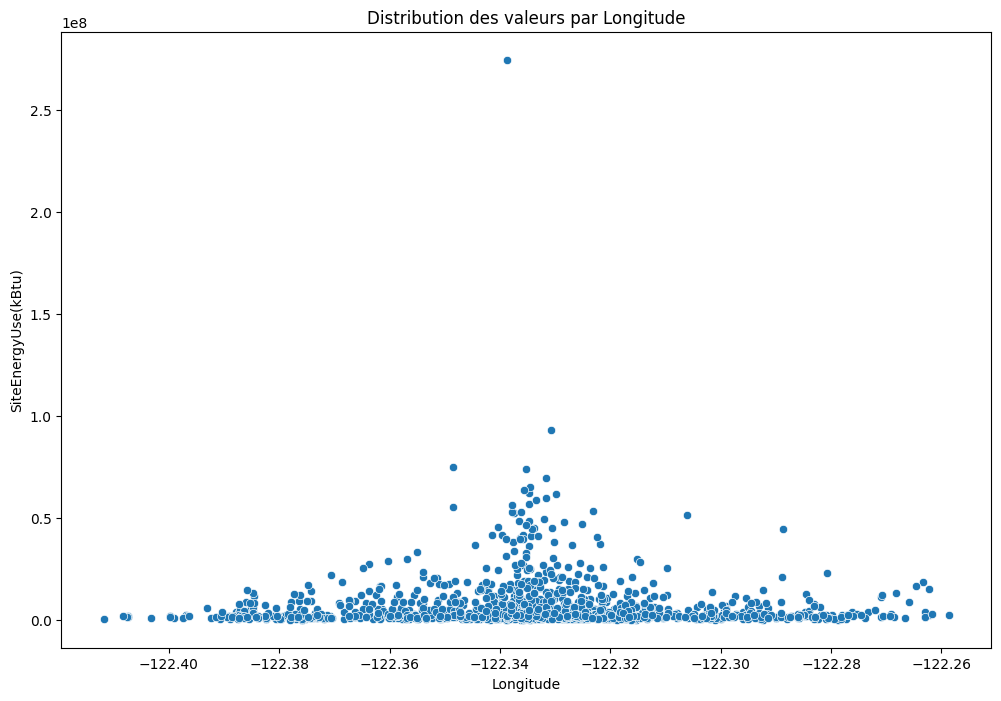

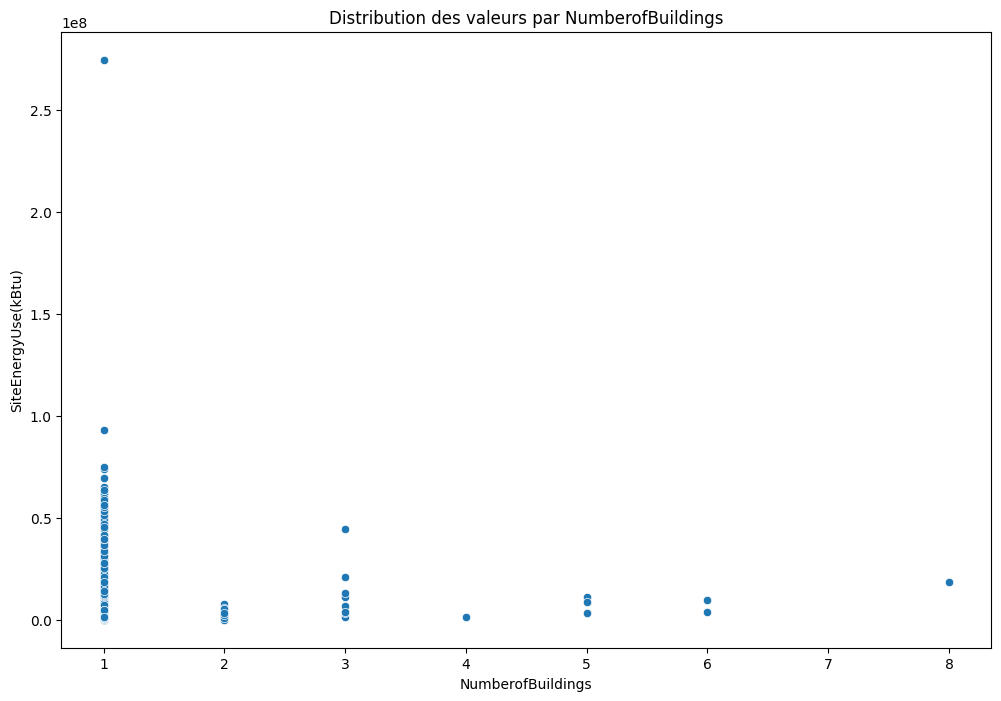

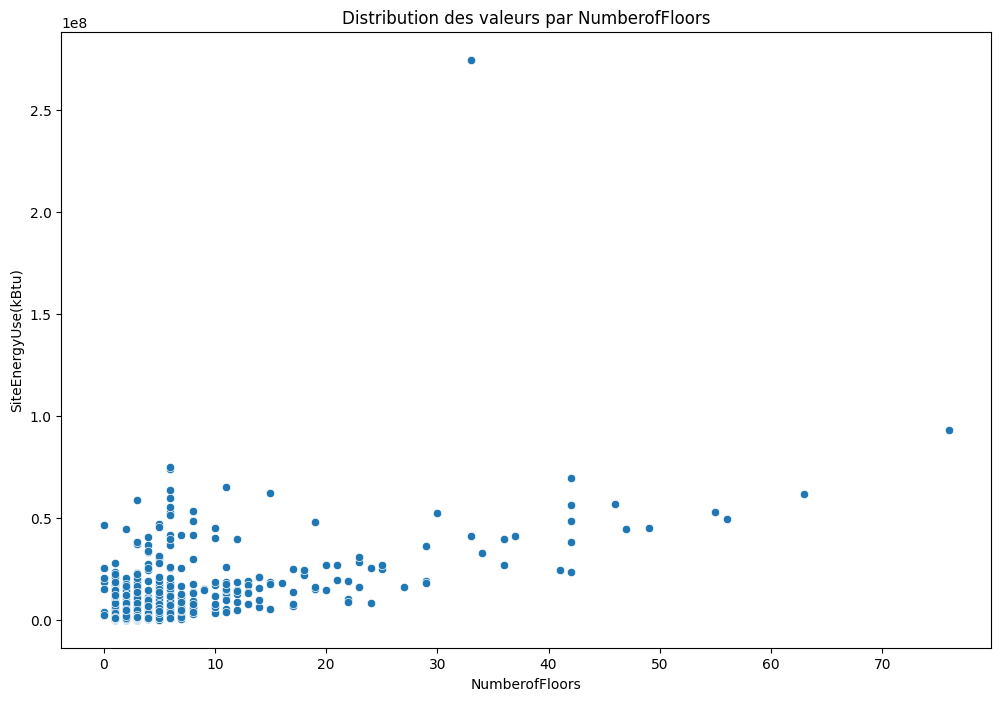

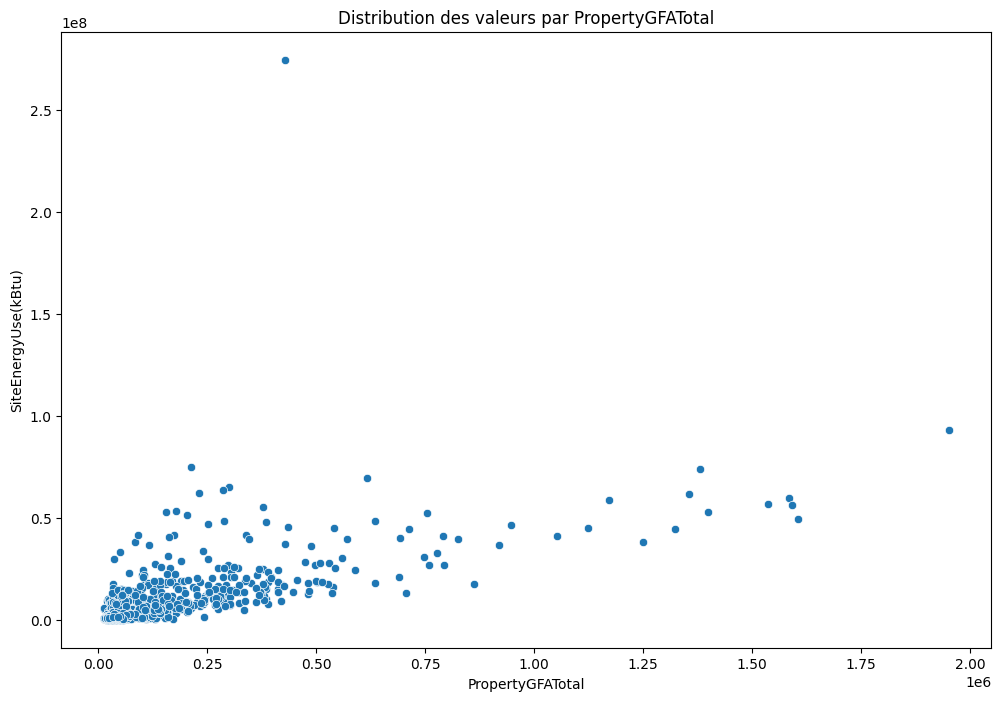

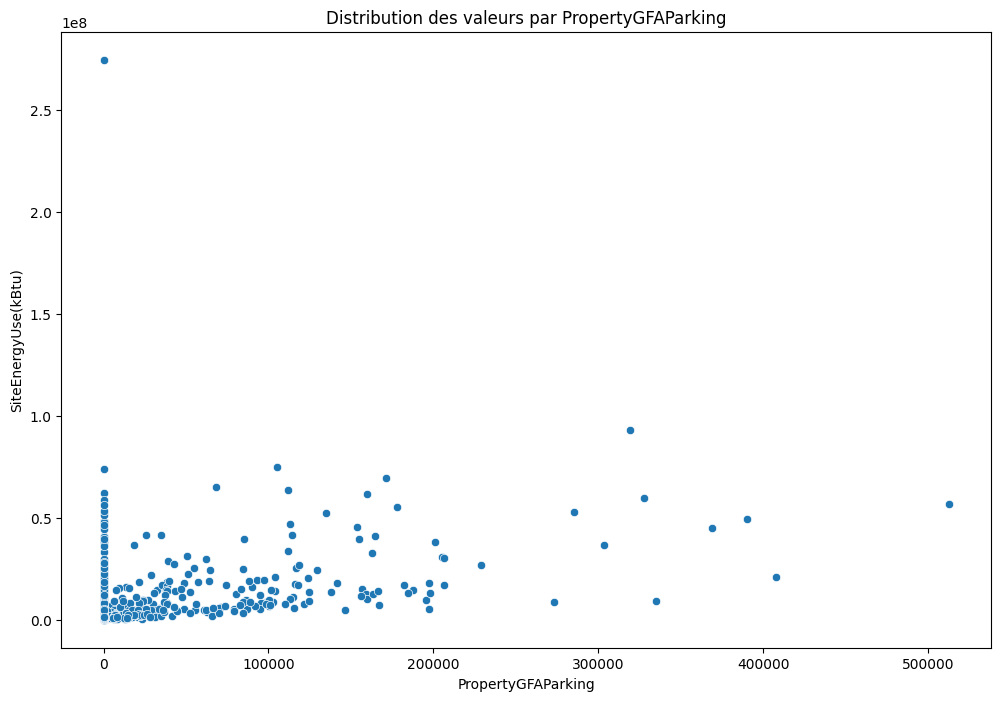

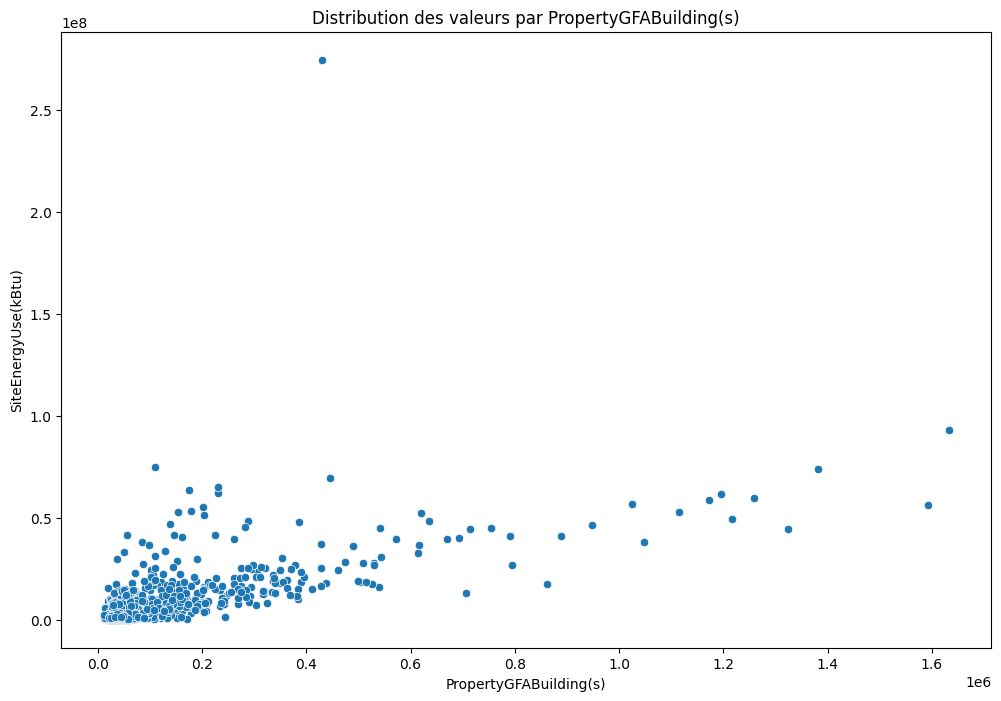

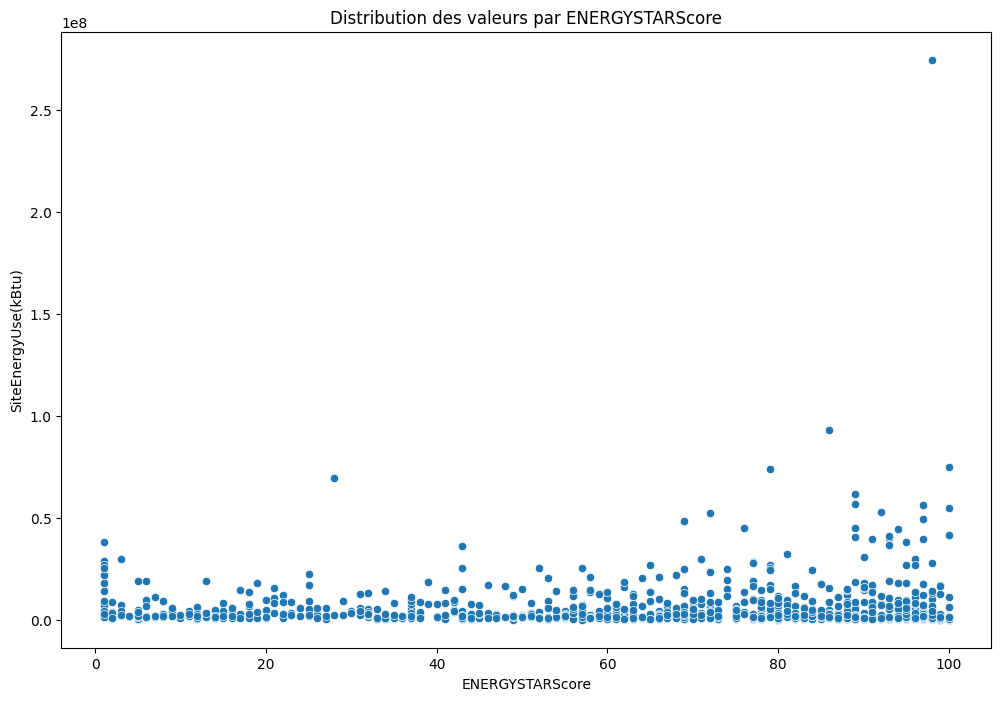

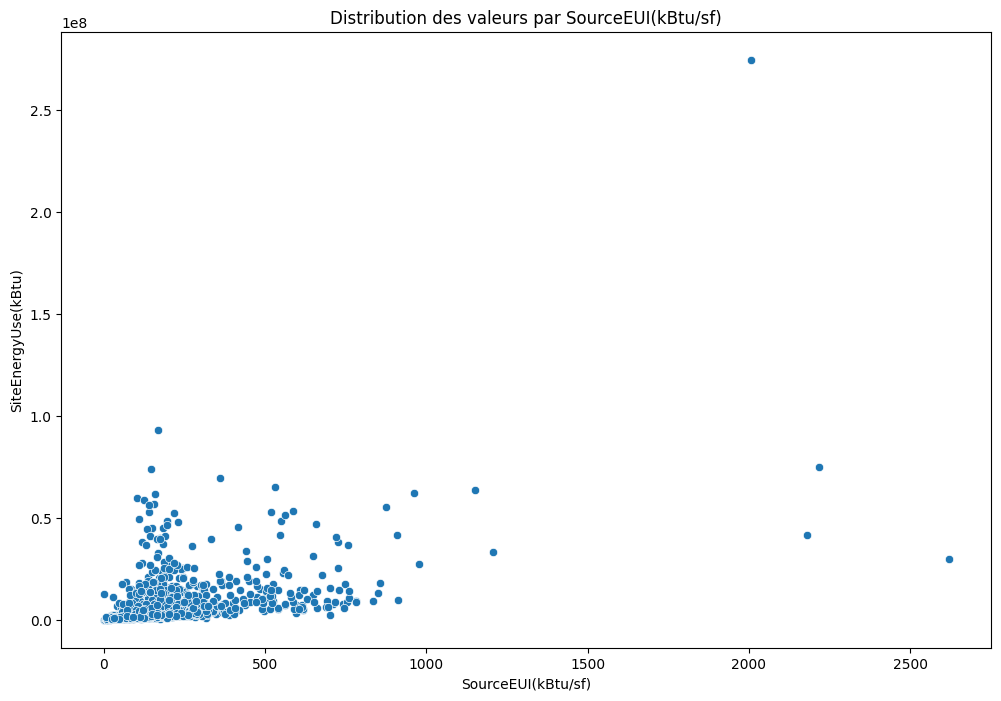

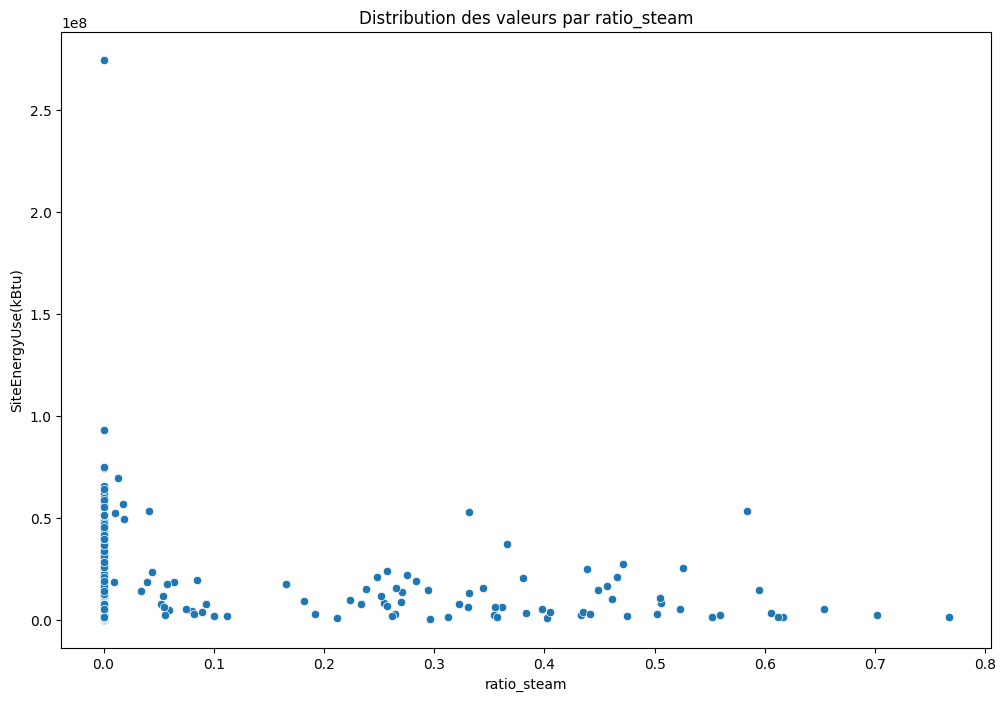

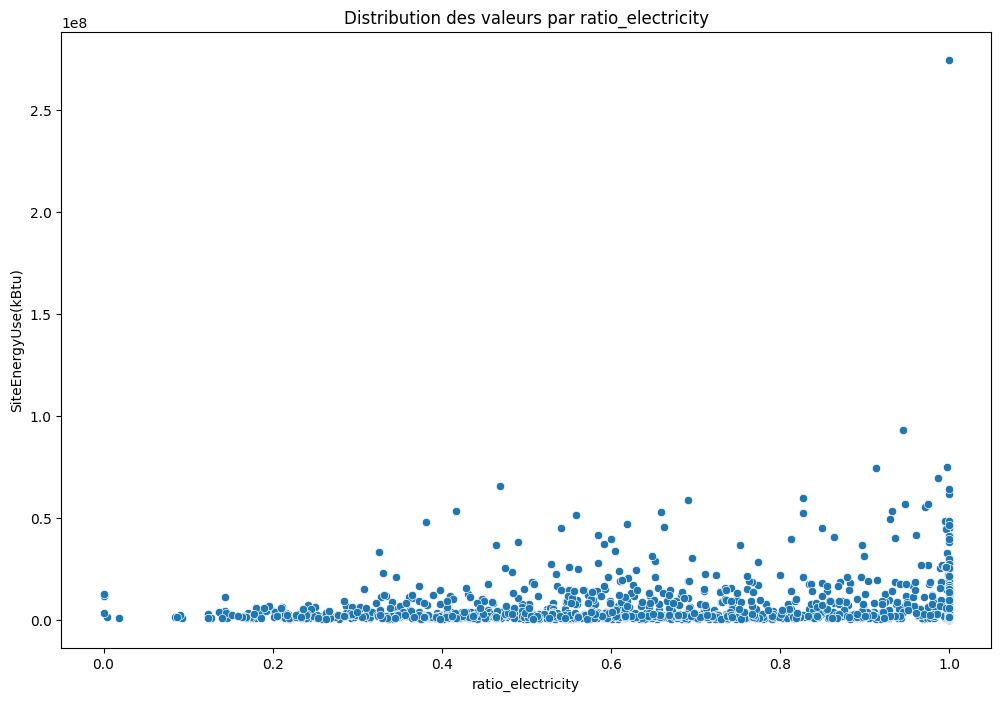

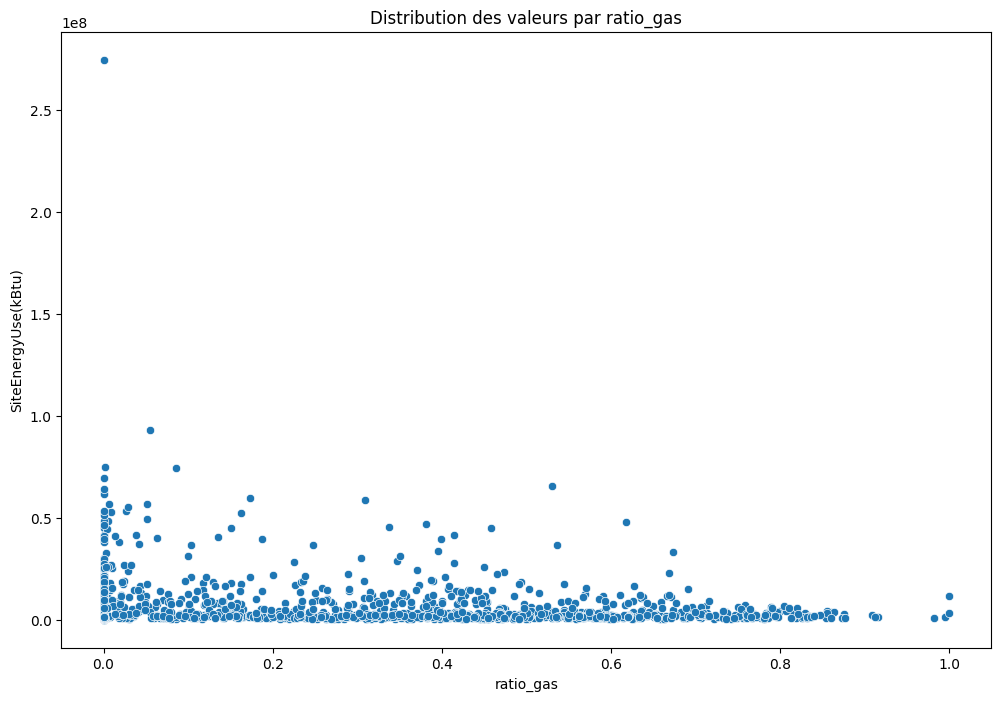

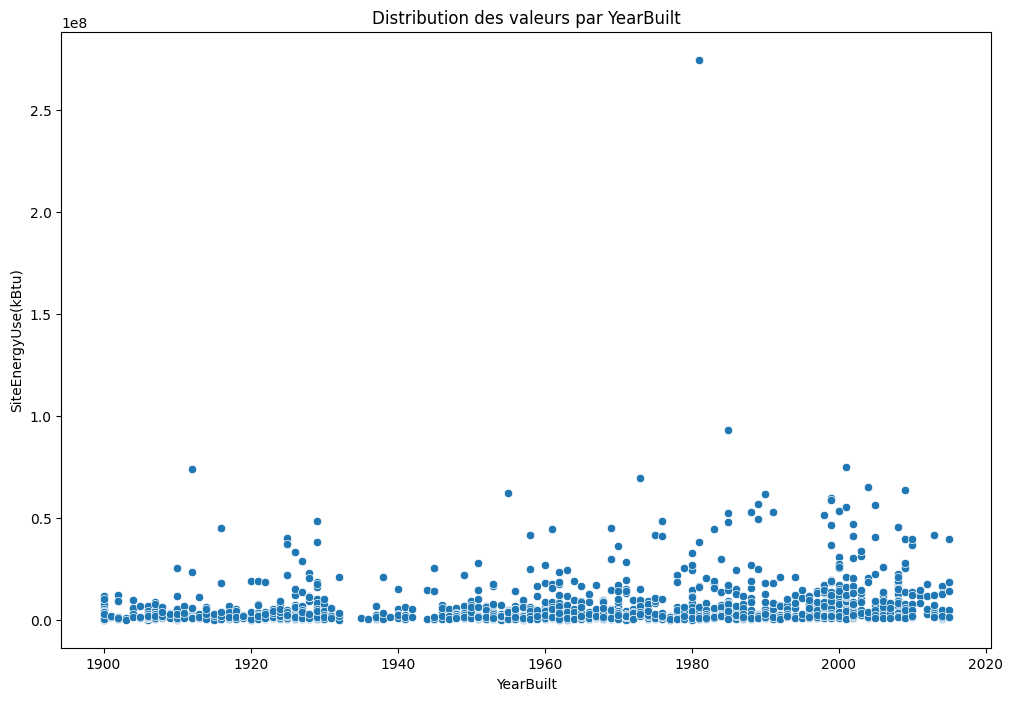

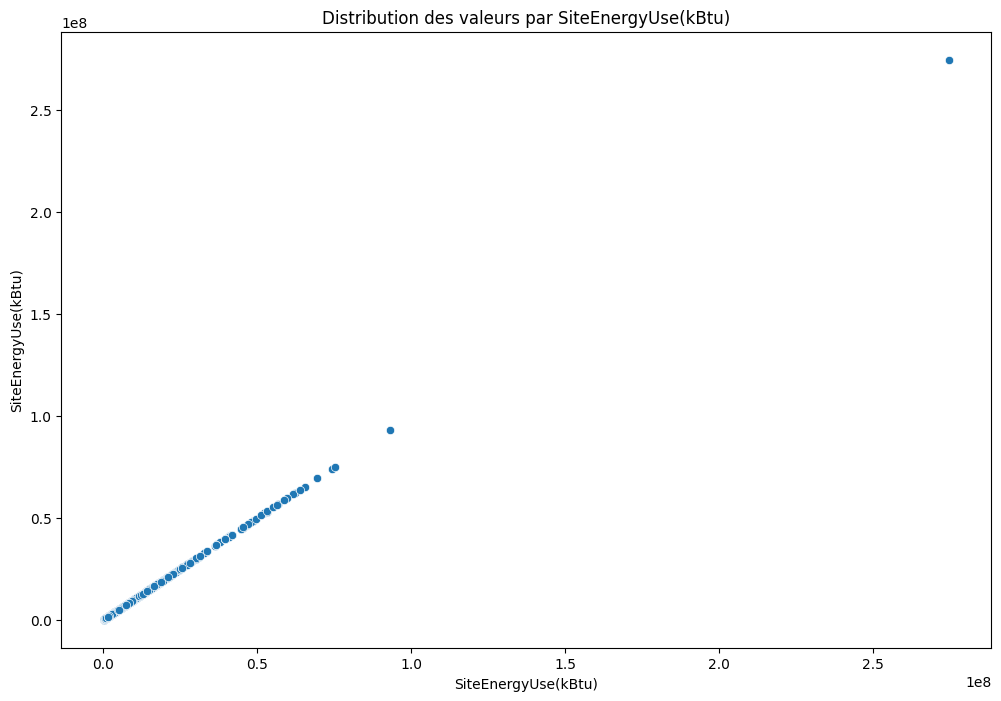

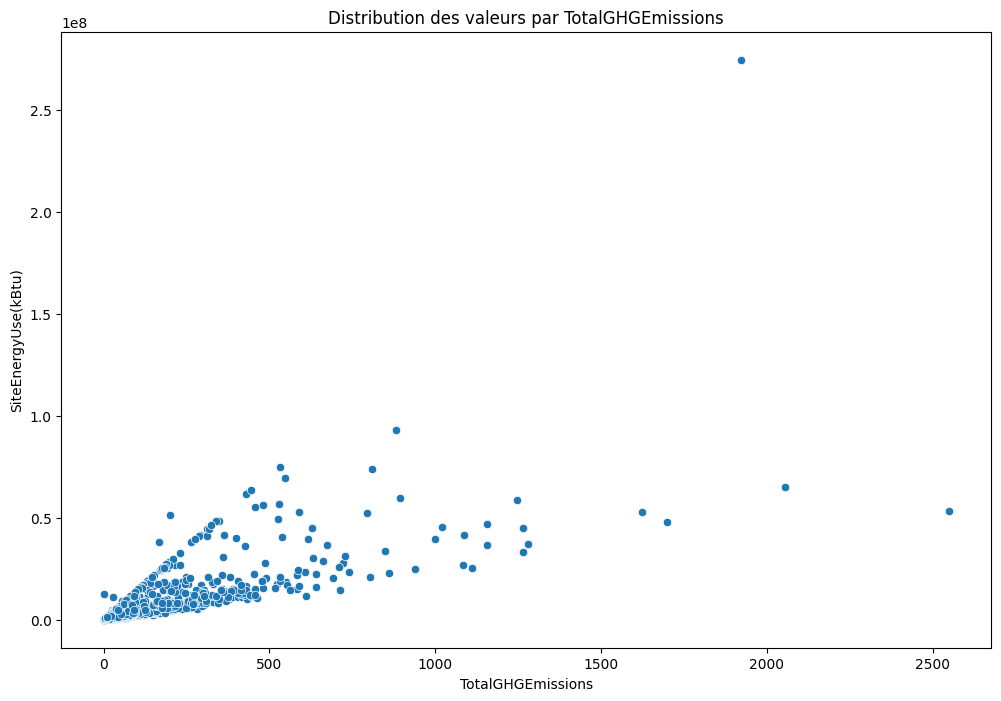

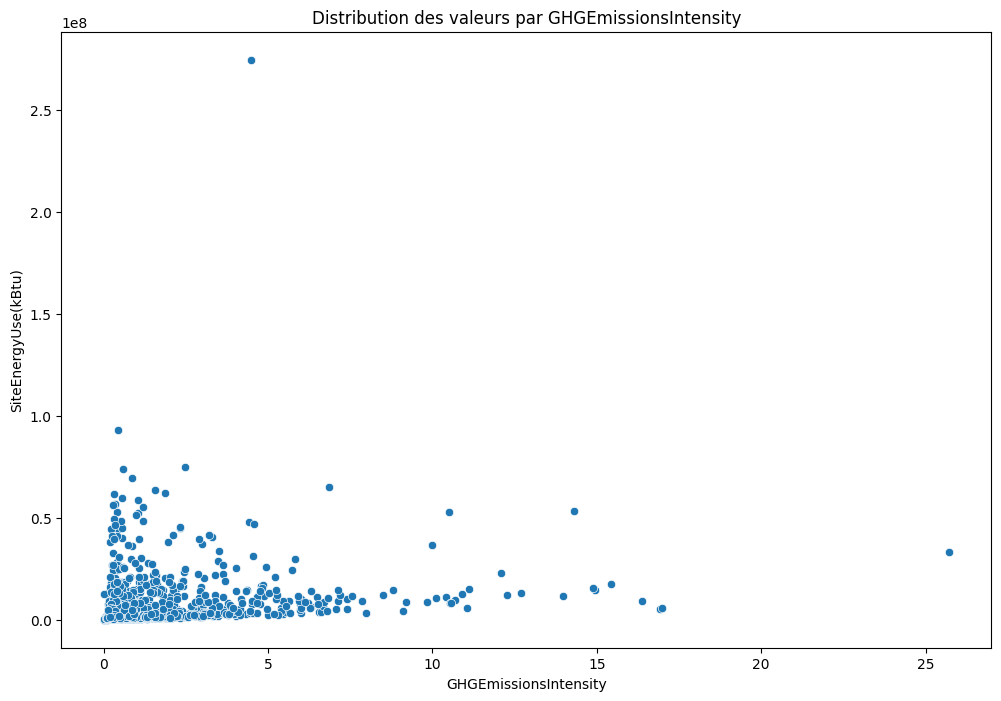

In [82]:
for quanti in liste_quanti :
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=quanti, y='SiteEnergyUse(kBtu)', data=building_consumption_clean)
    plt.title("Distribution des valeurs par "+ quanti)
    plt.show()

On peut déjà observer que certaines données n'ont aucune incidence particulière sur la consommation énergétique : Neighborhood, ENERGYSTARScore, YearBuilt, NumberofBuildings.

In [ ]:
building_consumption_clean.columns

## Corrélation avec l'année de construction

L'année de construction est sans doute déterminante pour un certain nombre de caractéristiques : la surface, le nombre d'étages, le quartier, le score energystar. Nous allons le vérifier.

In [56]:
building_consumption_clean.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'ZipCode', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'DefaultData',
       'ComplianceStatus', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'ratio_steam', 'ratio_electricity',
       'ratio_gas'],
      dtype='object')

In [ ]:
col_analyse_year = ('BuildingType', 'PrimaryPropertyType','Neighborhood', 'Latitude', 'Longitude',
        'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'DefaultData',
       'ComplianceStatus', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'ratio_steam', 'ratio_electricity',
       'ratio_gas')
col_analyse_year





#### Variables quantitatives

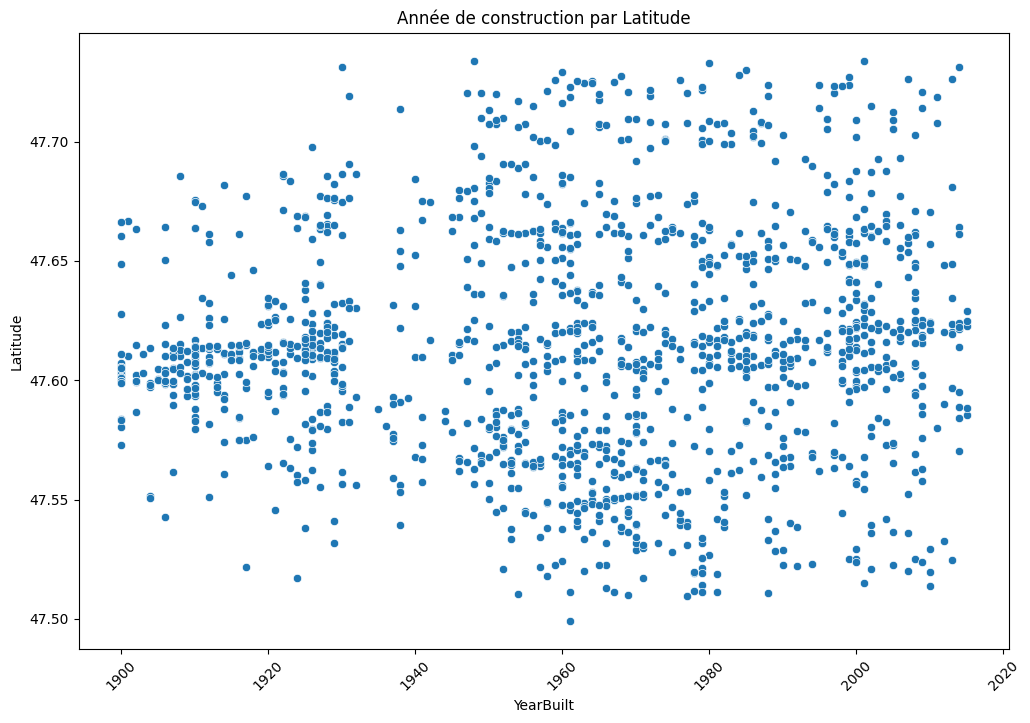

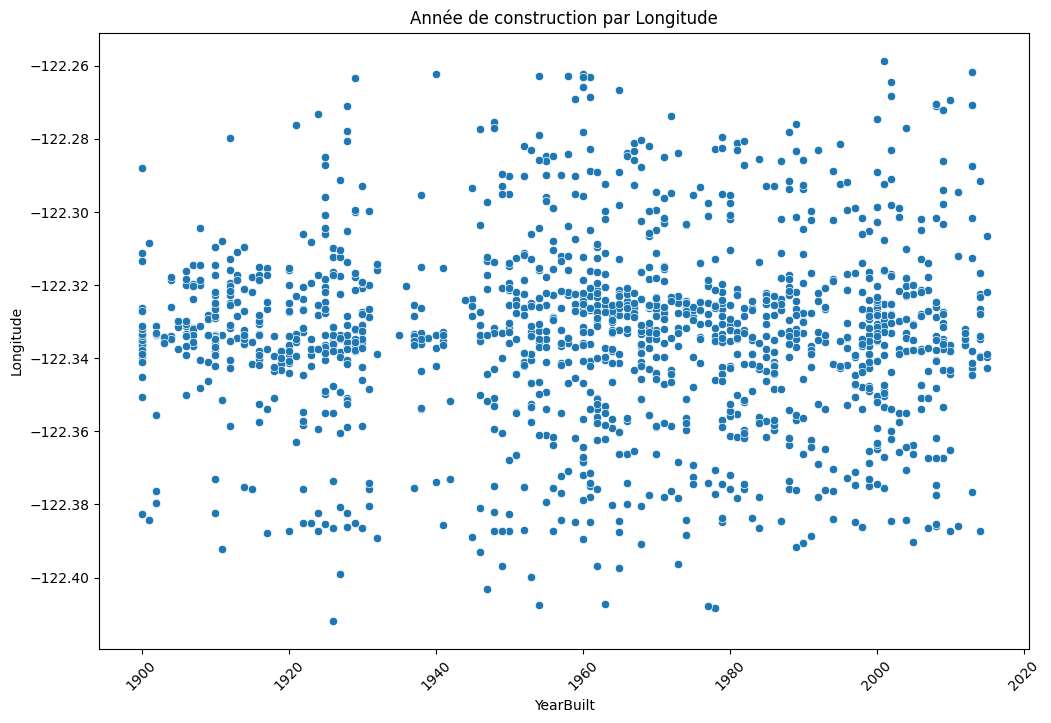

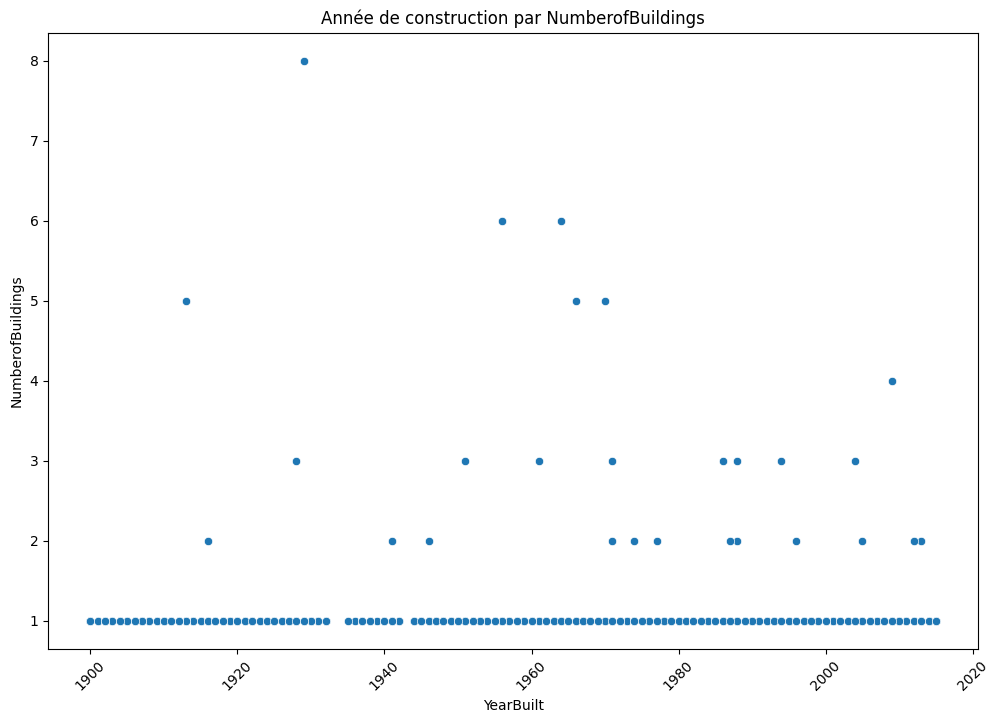

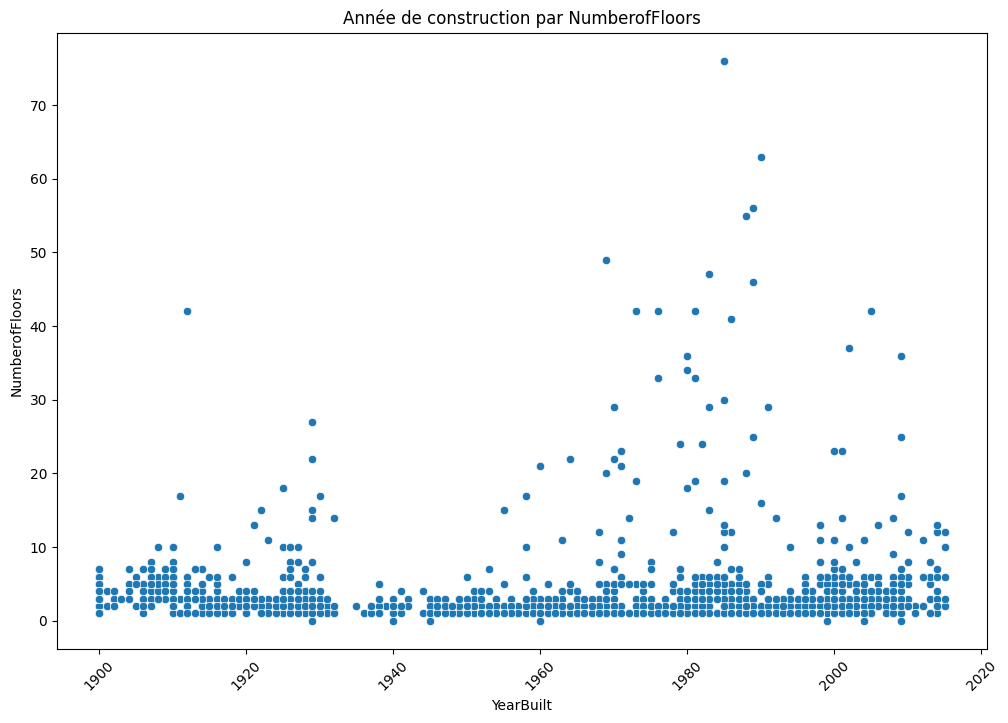

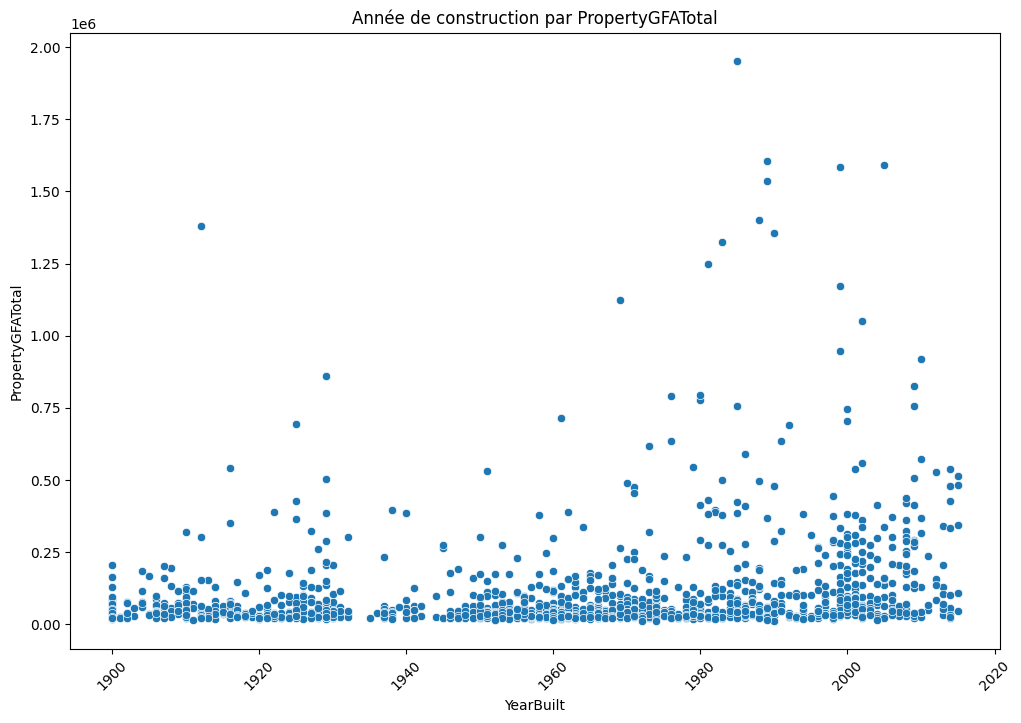

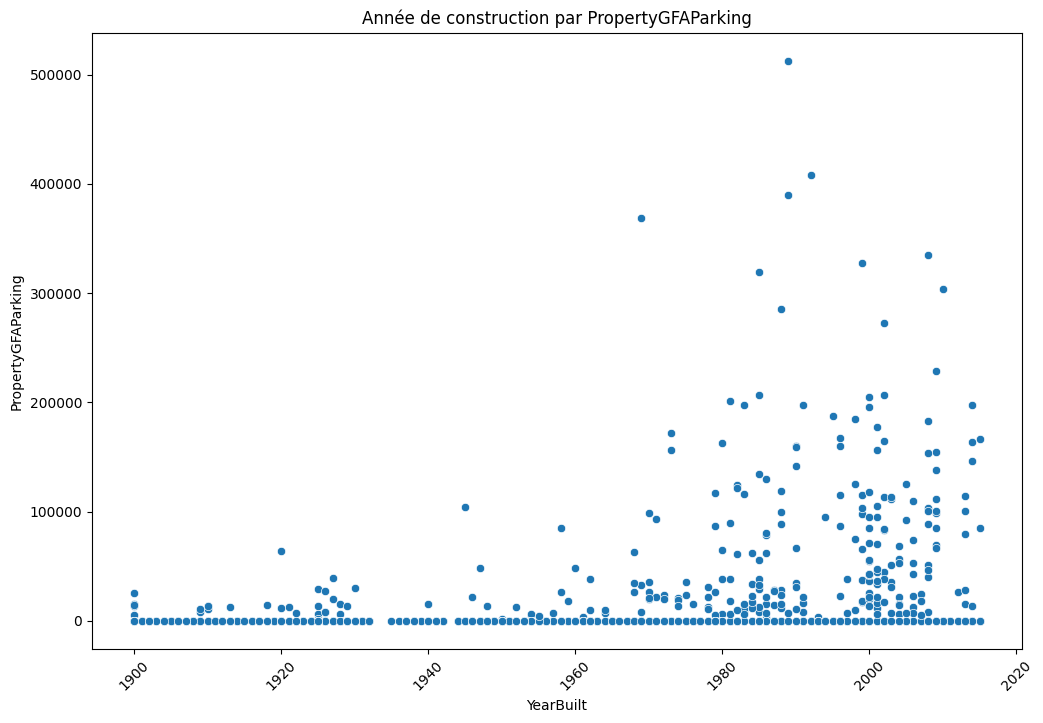

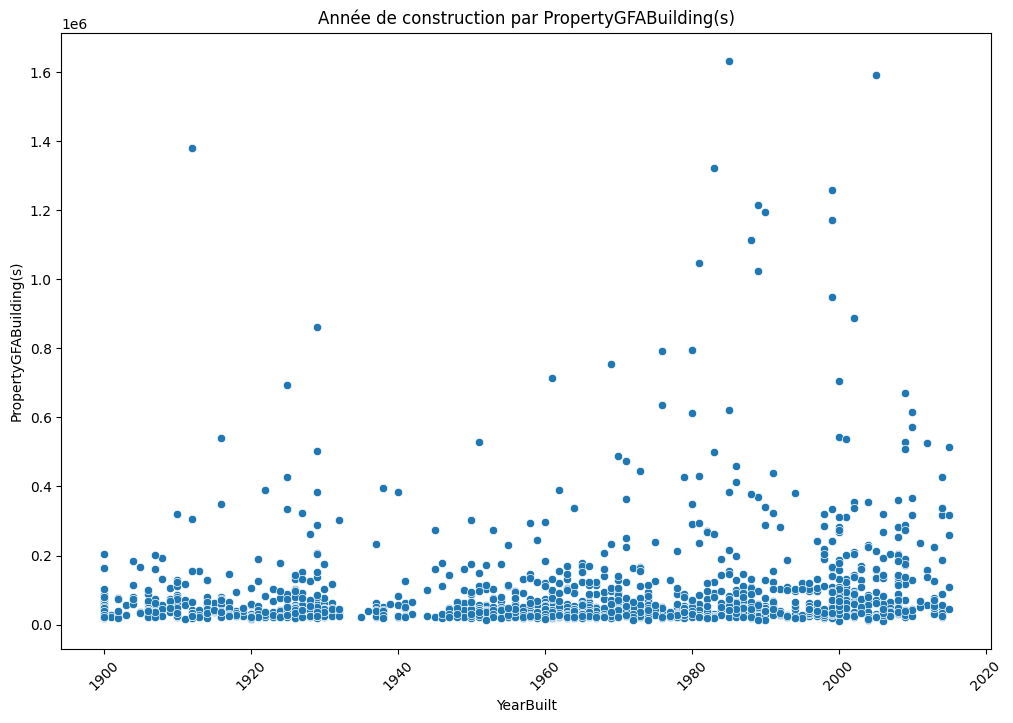

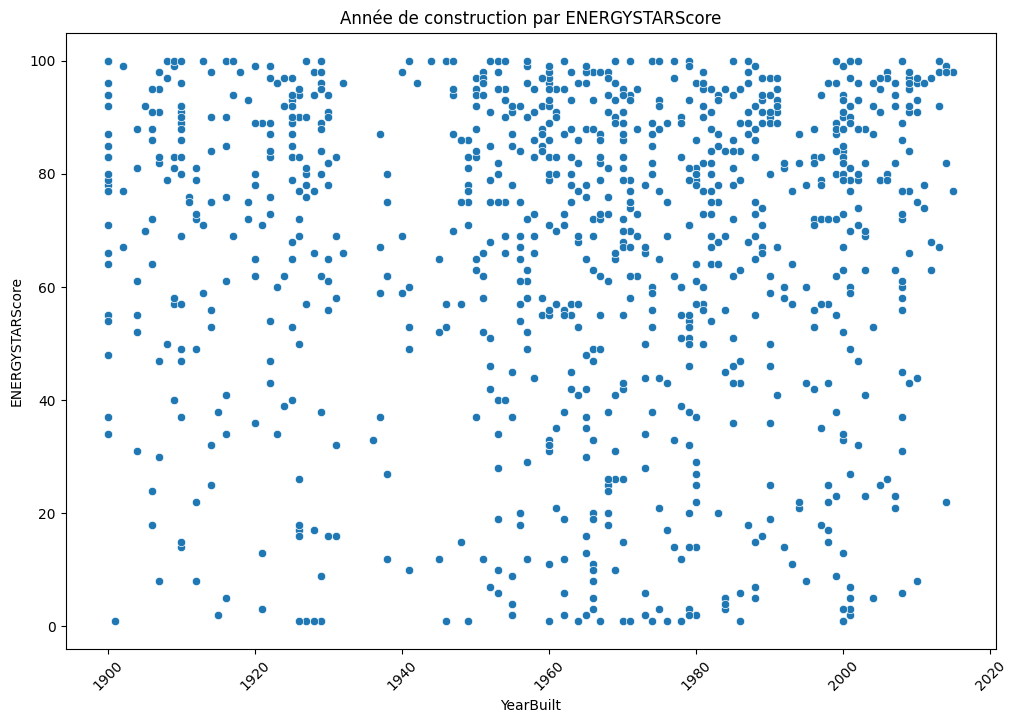

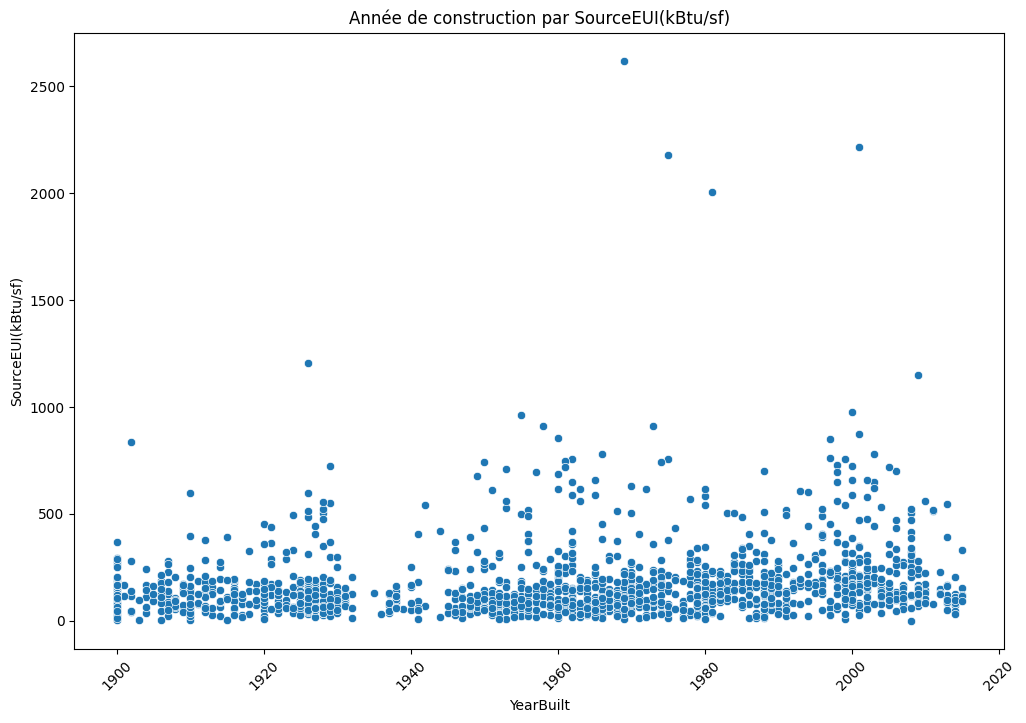

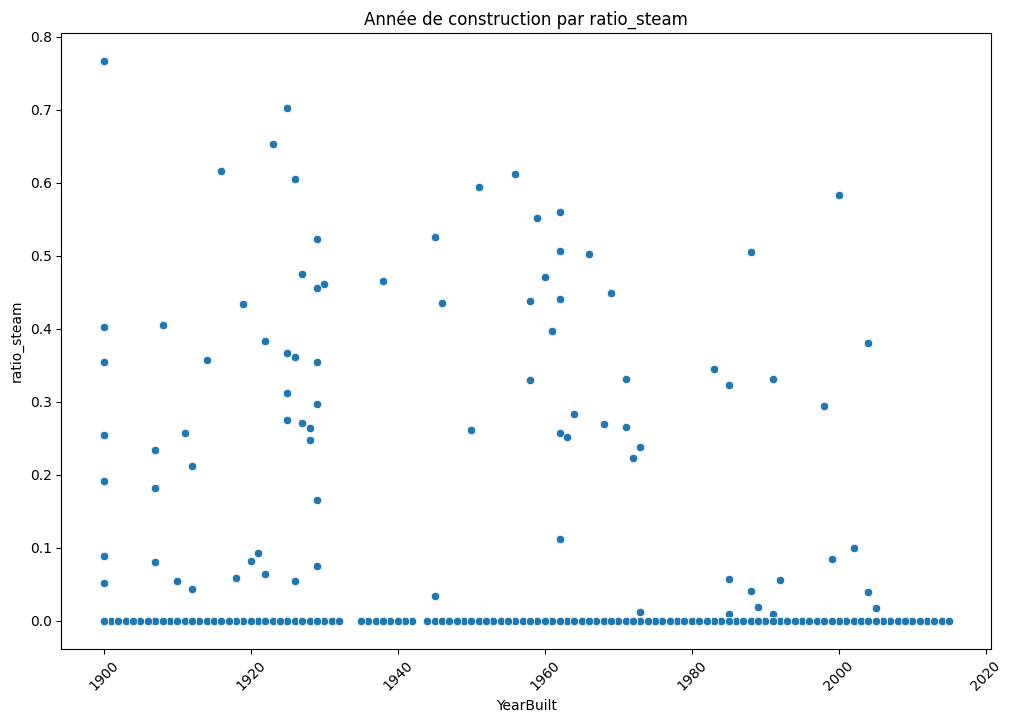

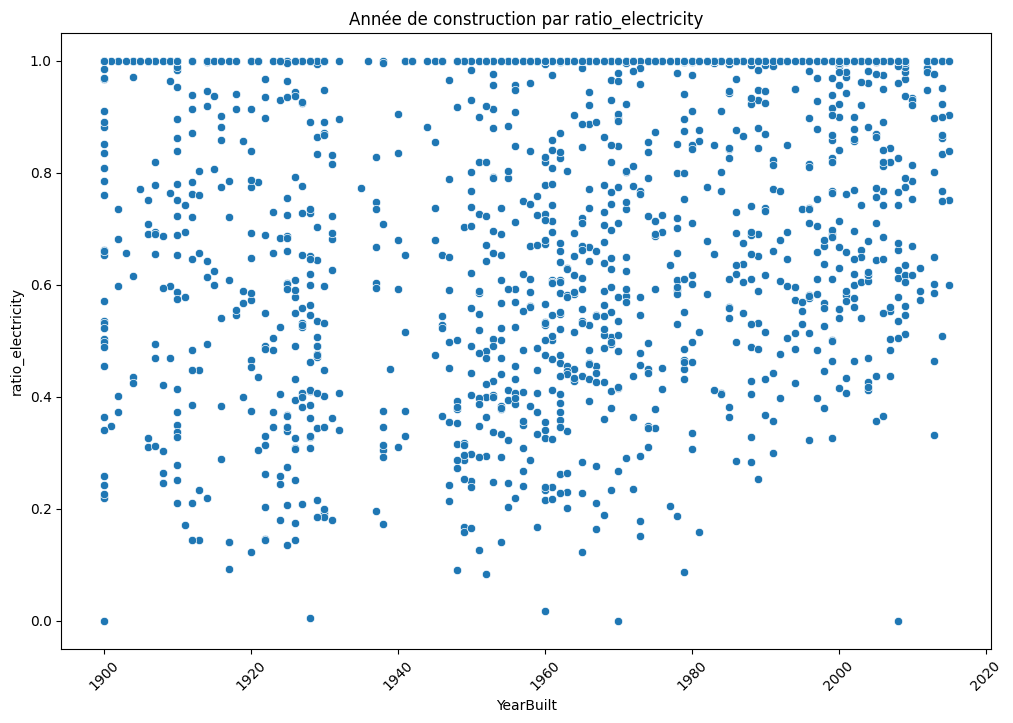

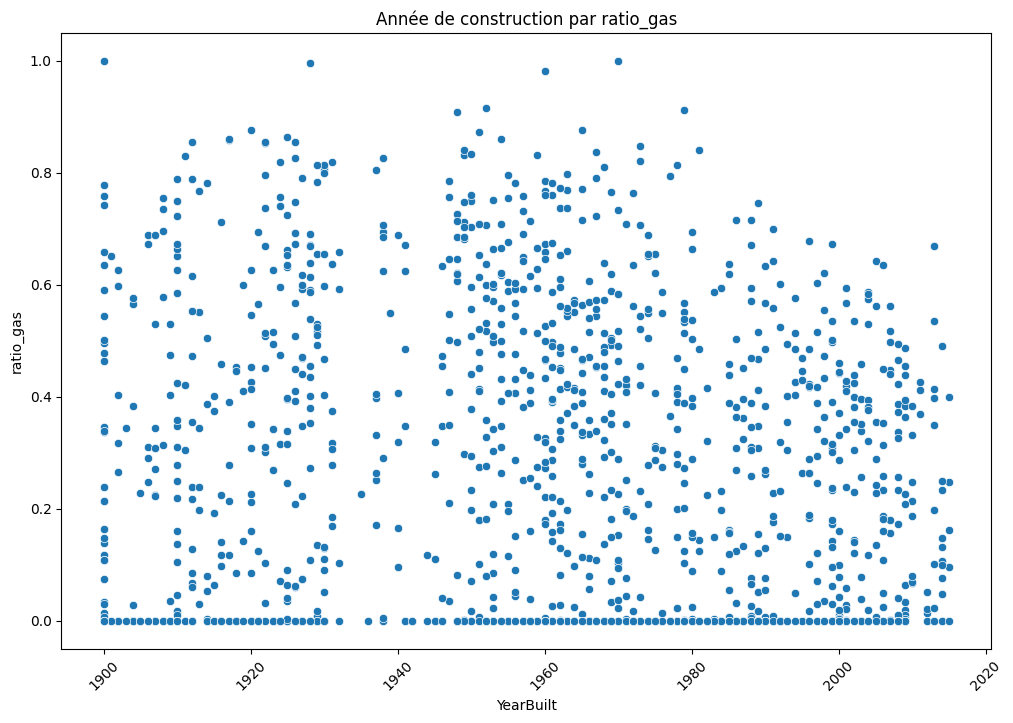

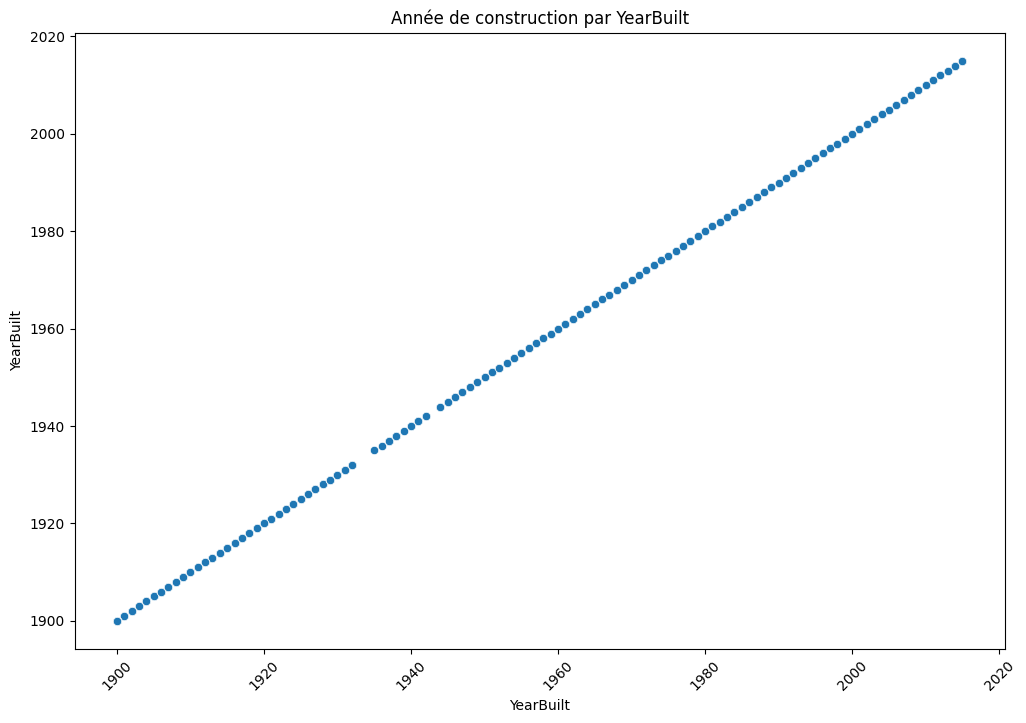

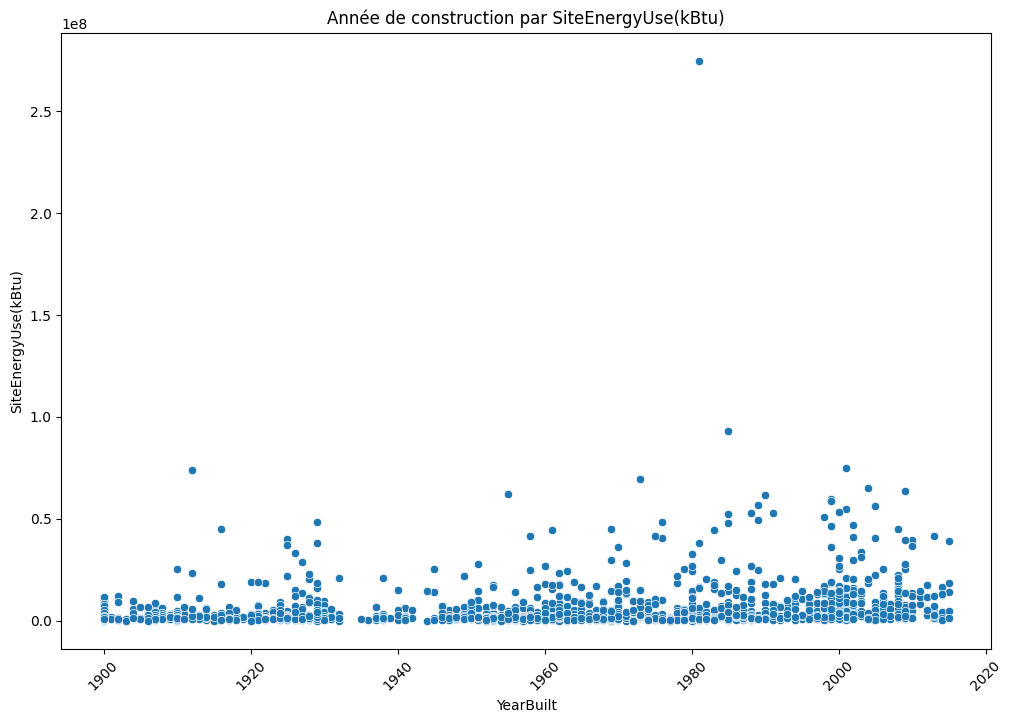

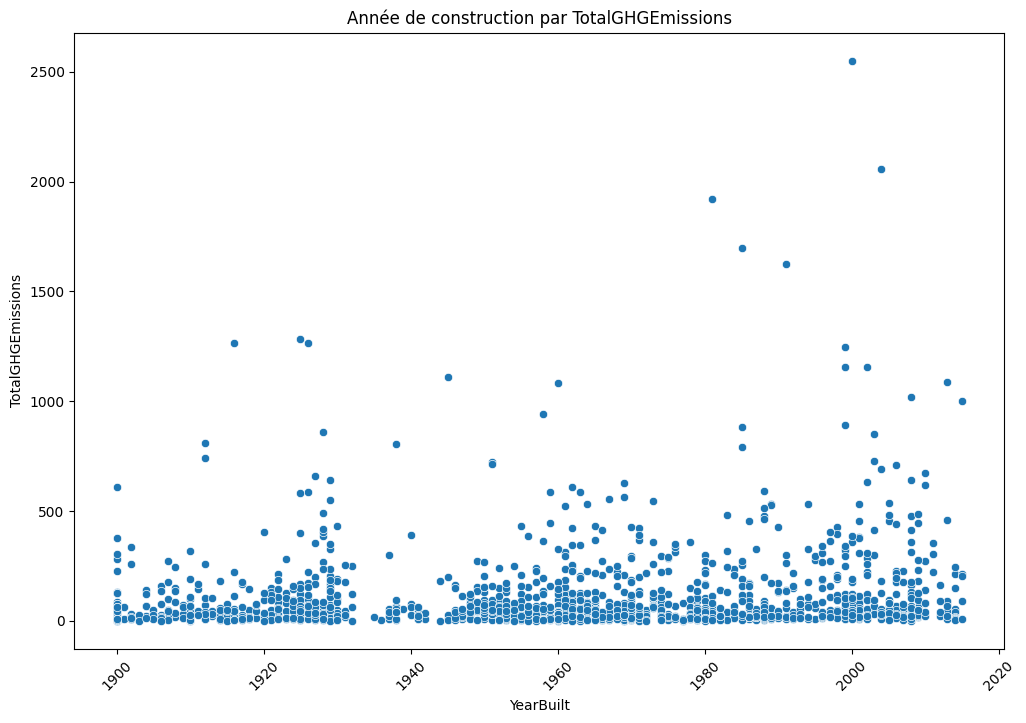

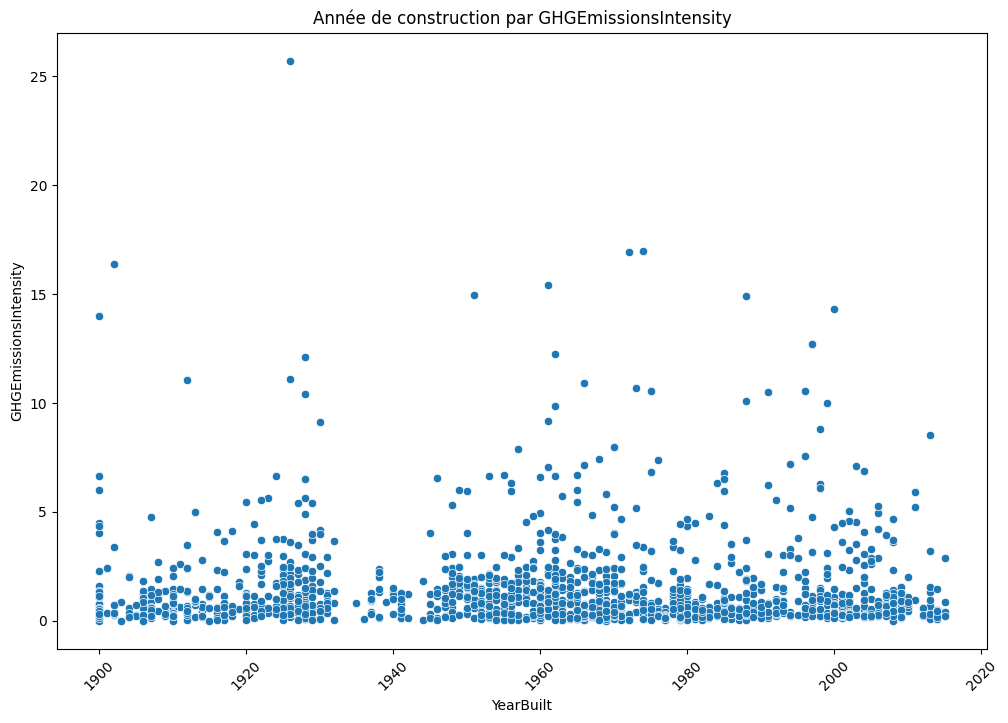

In [59]:
for quanti in liste_quanti :
    plt.figure(figsize=(12, 8))
    sns.scatterplot(y=quanti, x='YearBuilt', data=building_consumption_clean)
    plt.title("Année de construction par "+ quanti)
    plt.xticks(rotation=45)
    plt.show()

#### Variables qualitatives

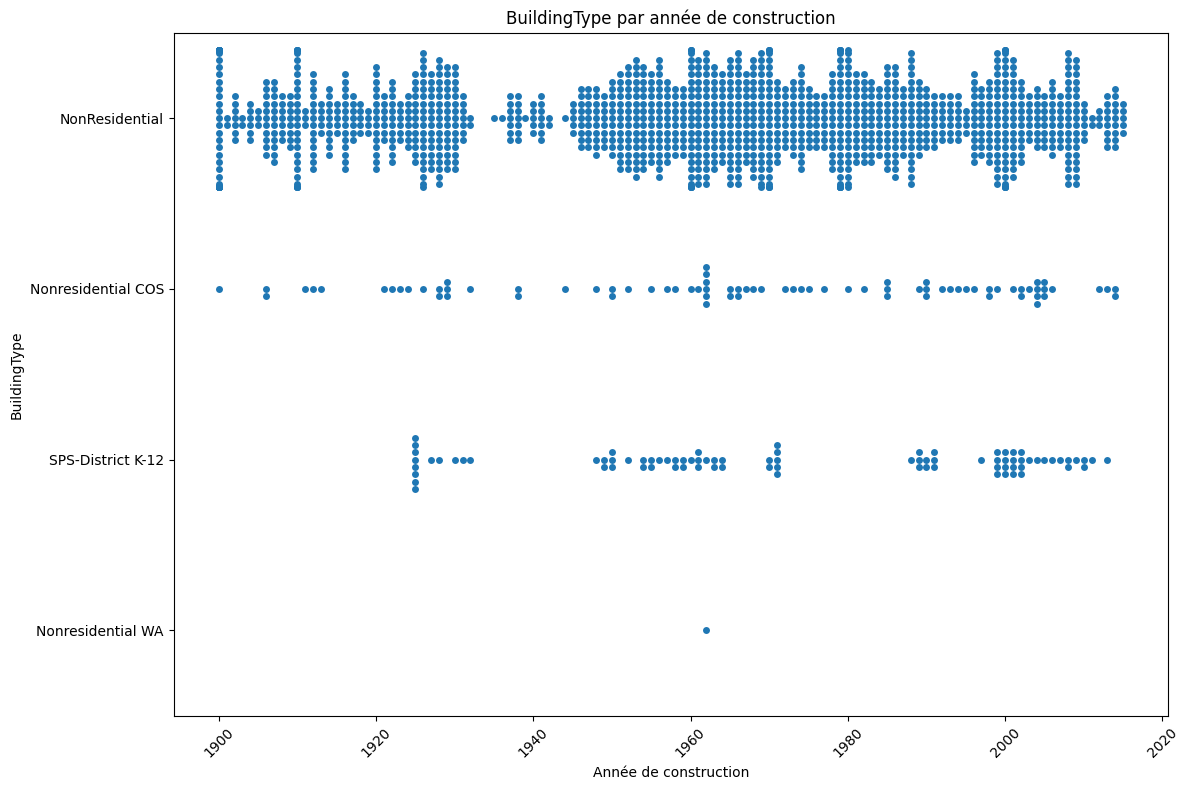

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 33.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 16.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use st

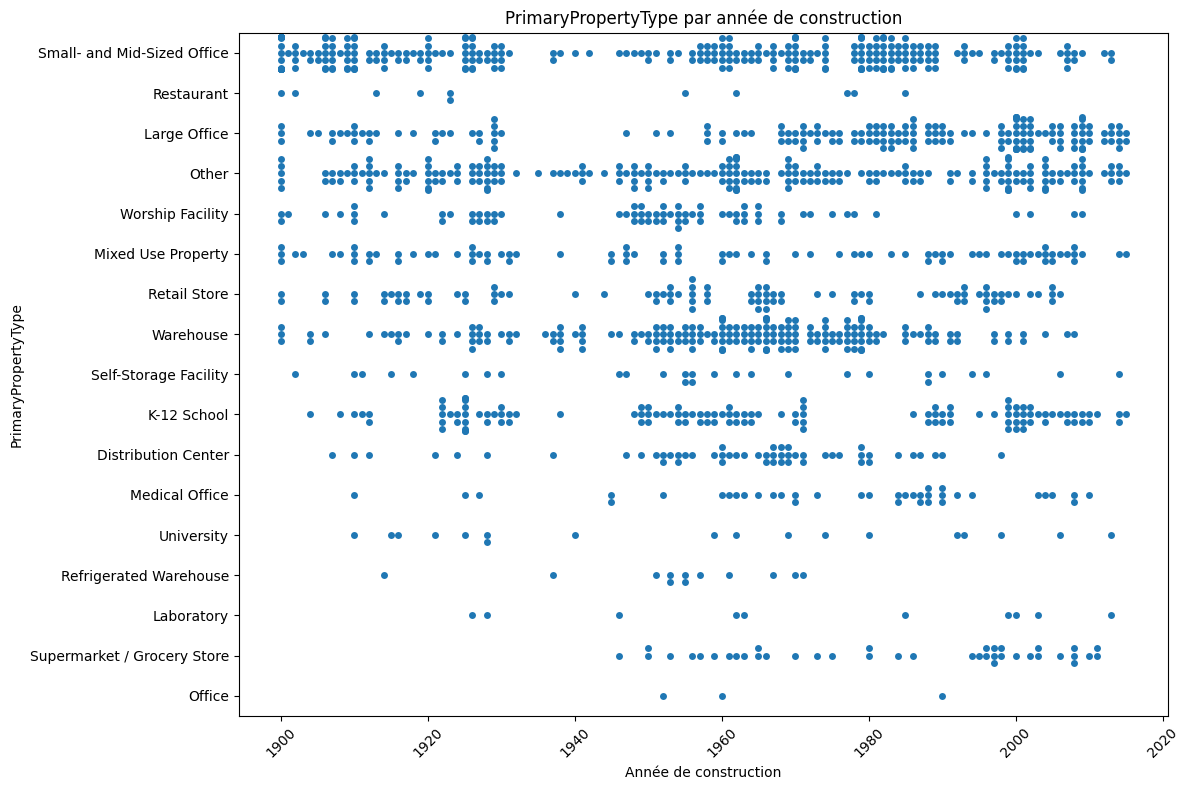

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use s

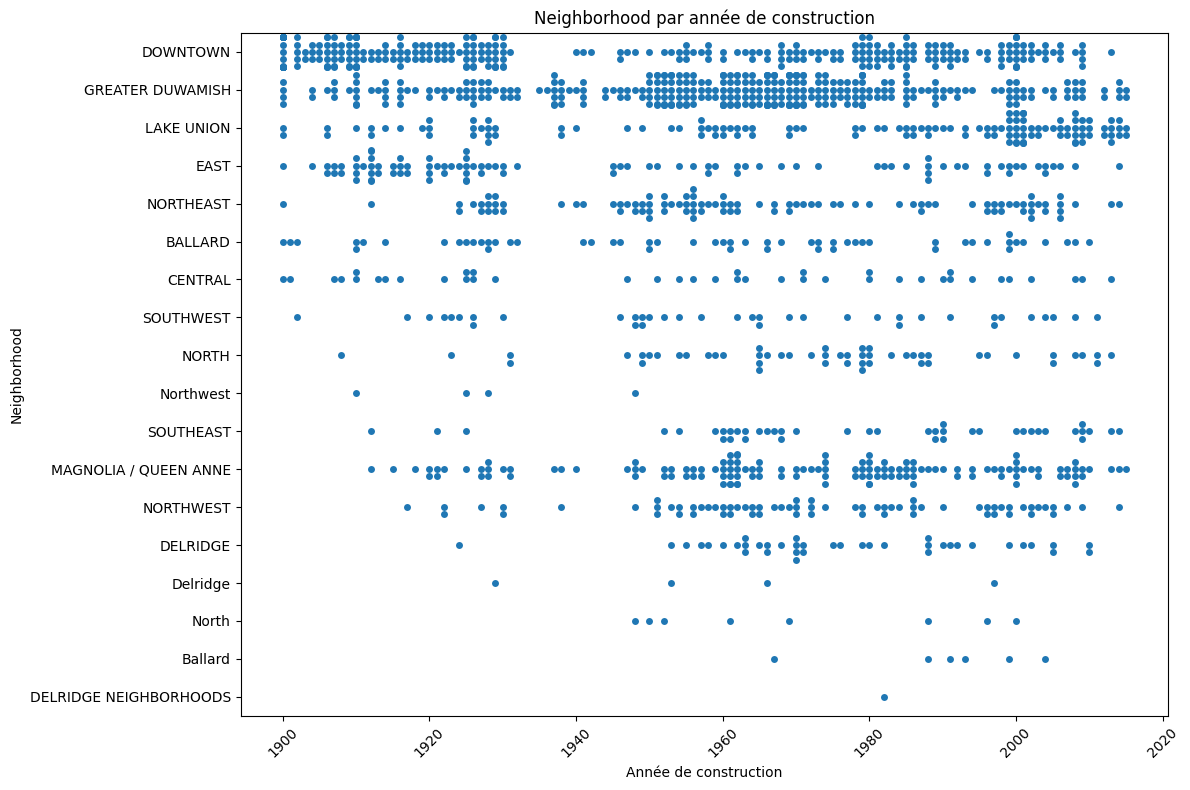

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use s

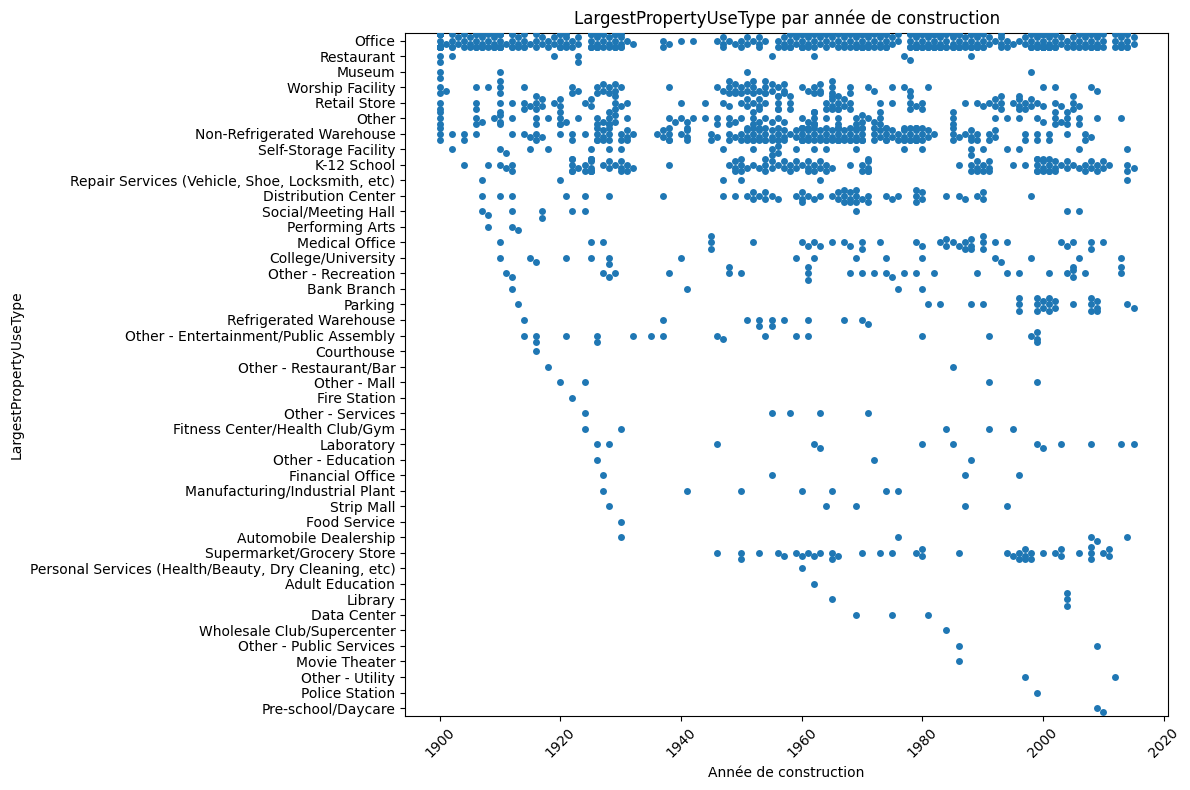

In [87]:
for quali in liste_quali:
    plt.figure(figsize=(12, 8))
    sns.swarmplot(data=building_consumption_clean, x='YearBuilt', y=quali)
    plt.xticks(rotation=45)
    plt.title(f"{quali} par année de construction")
    plt.xlabel("Année de construction")
    plt.ylabel(f"{quali}")
    plt.tight_layout()  # Pour éviter que les éléments ne se chevauchent
    plt.show()

## Corrélation avec le quartier

### Variables quantitatives

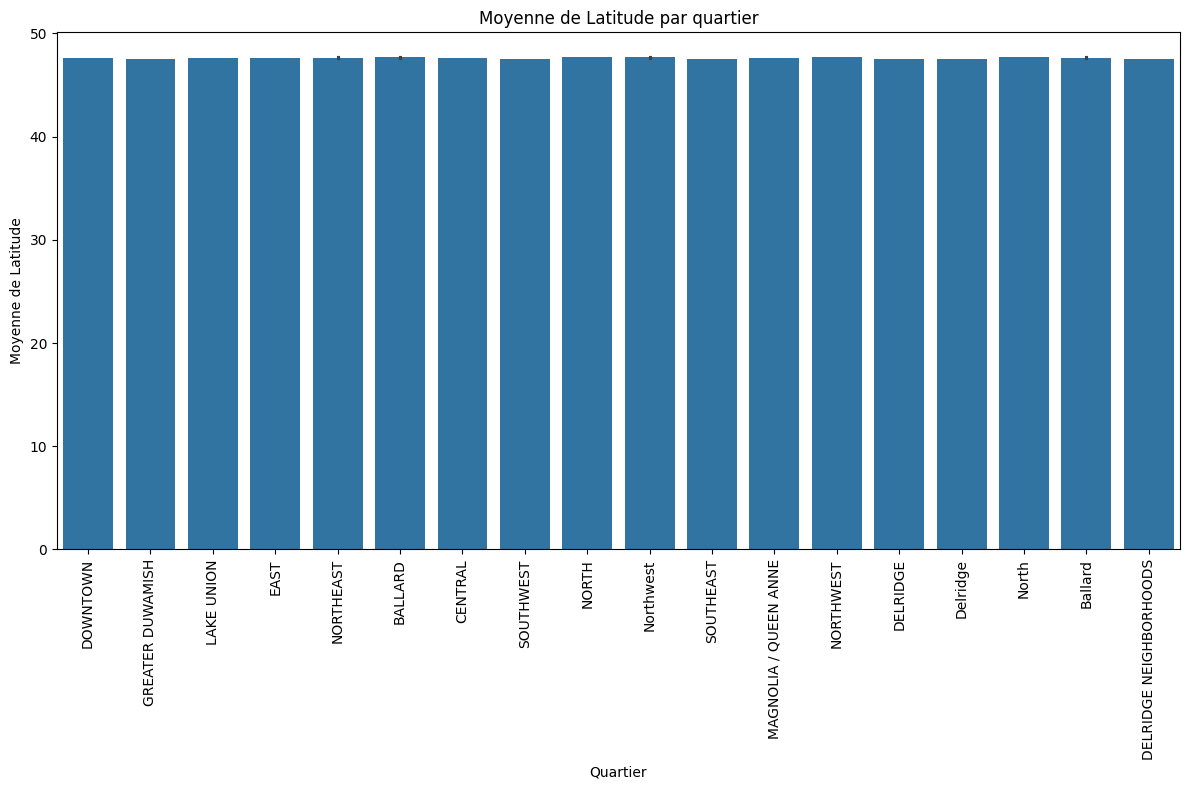

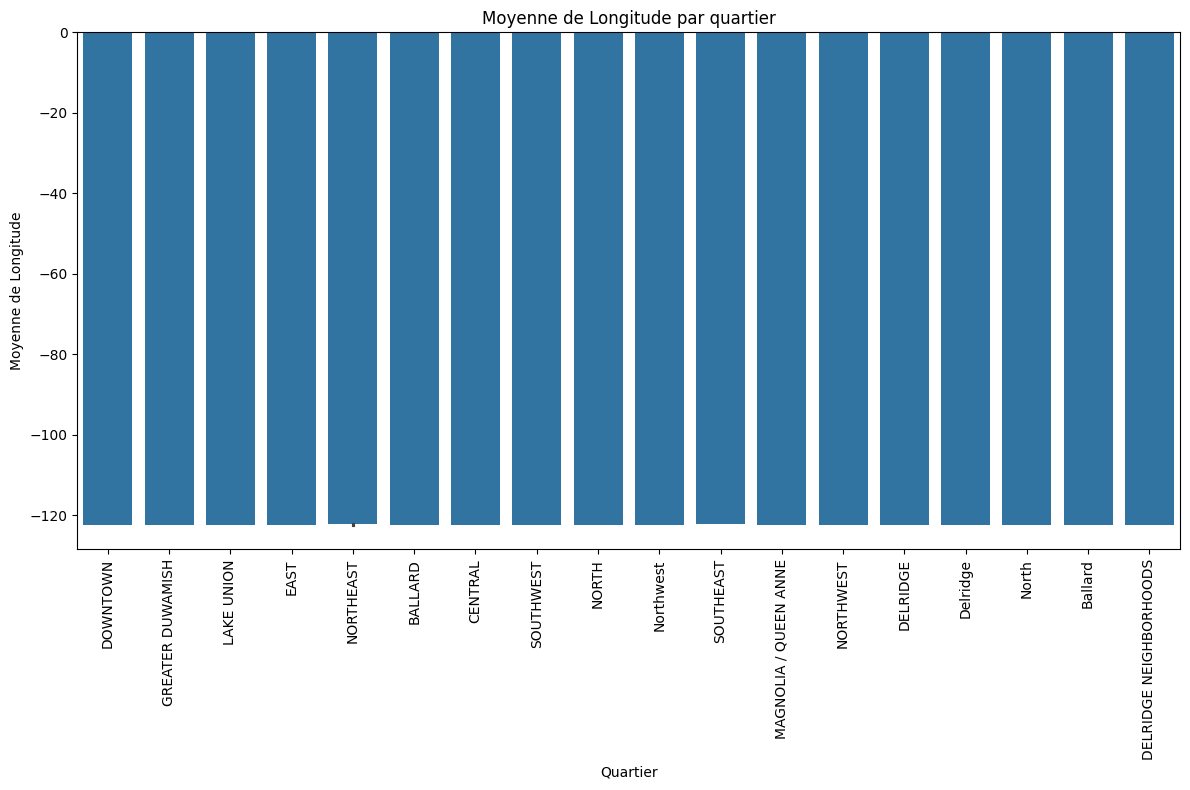

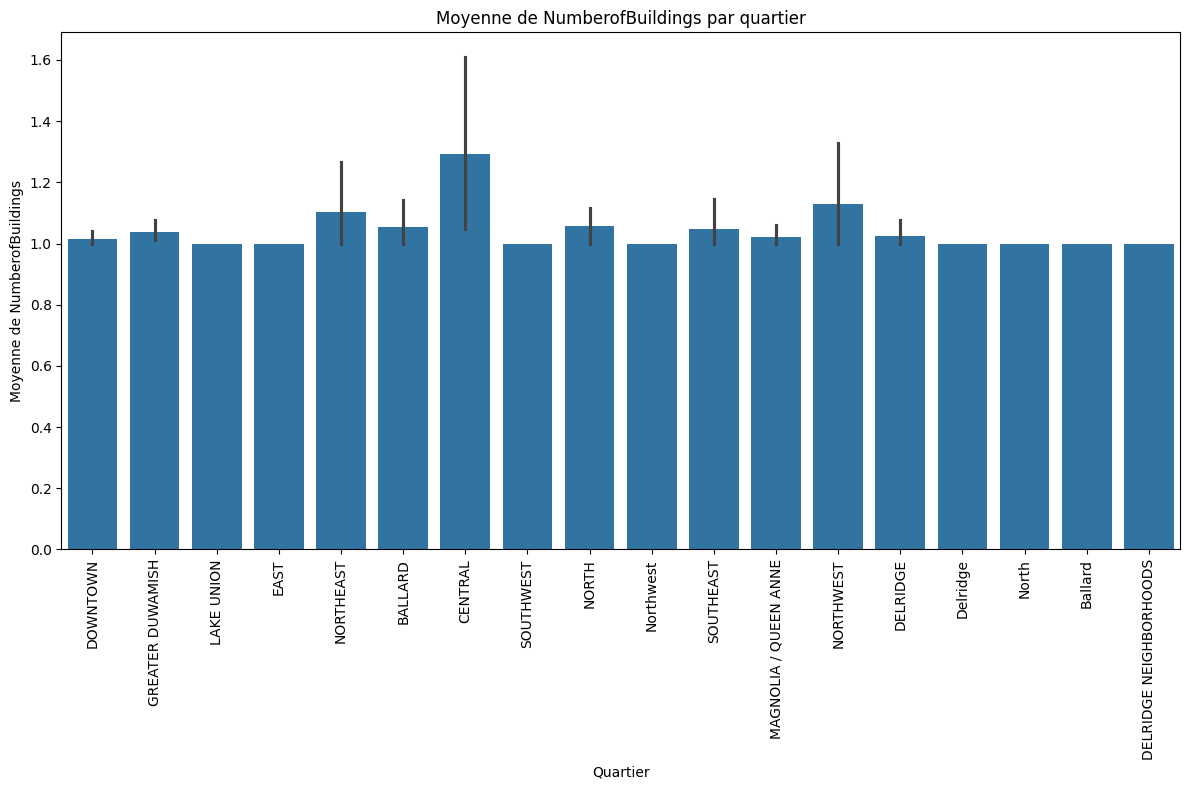

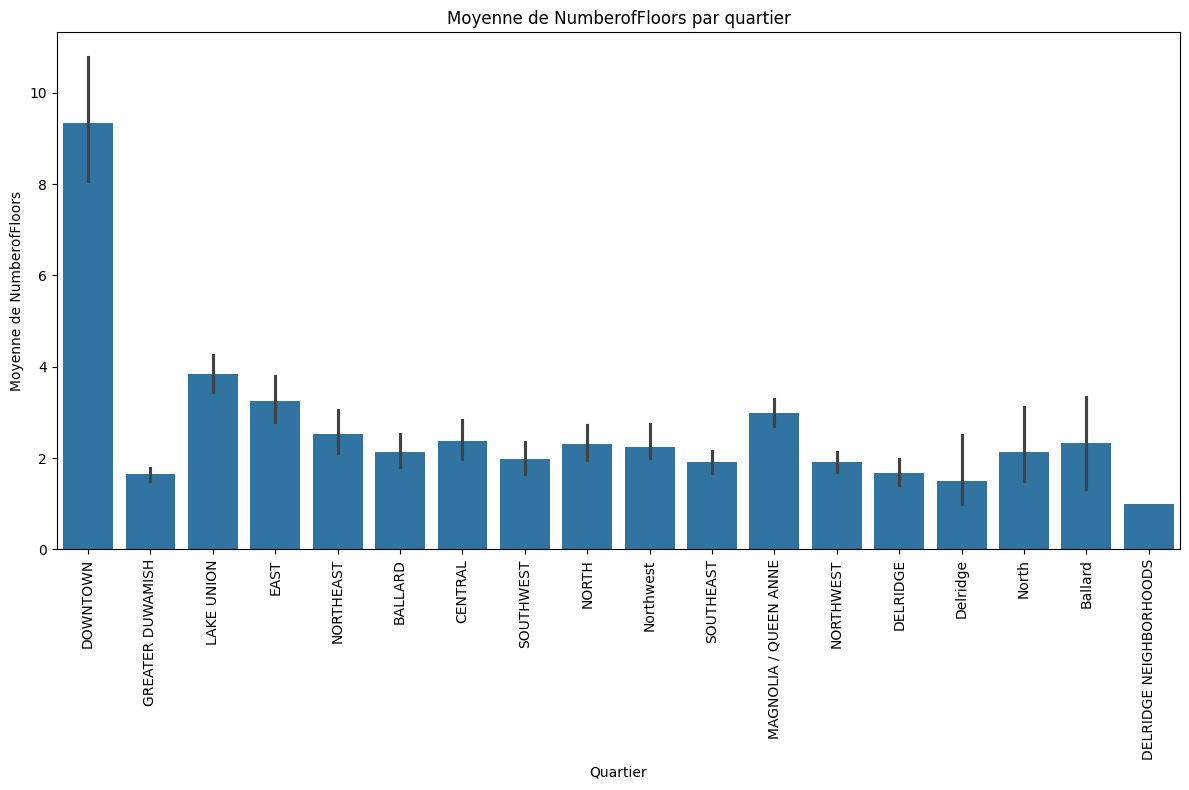

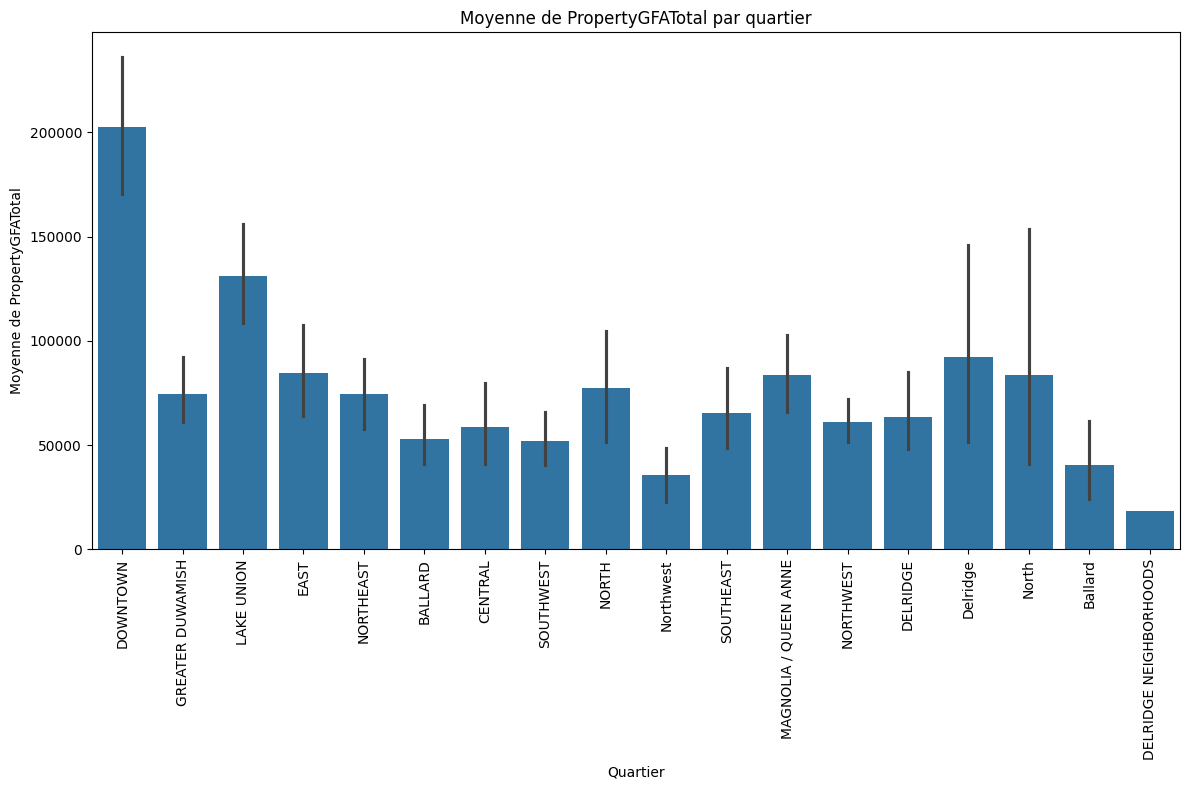

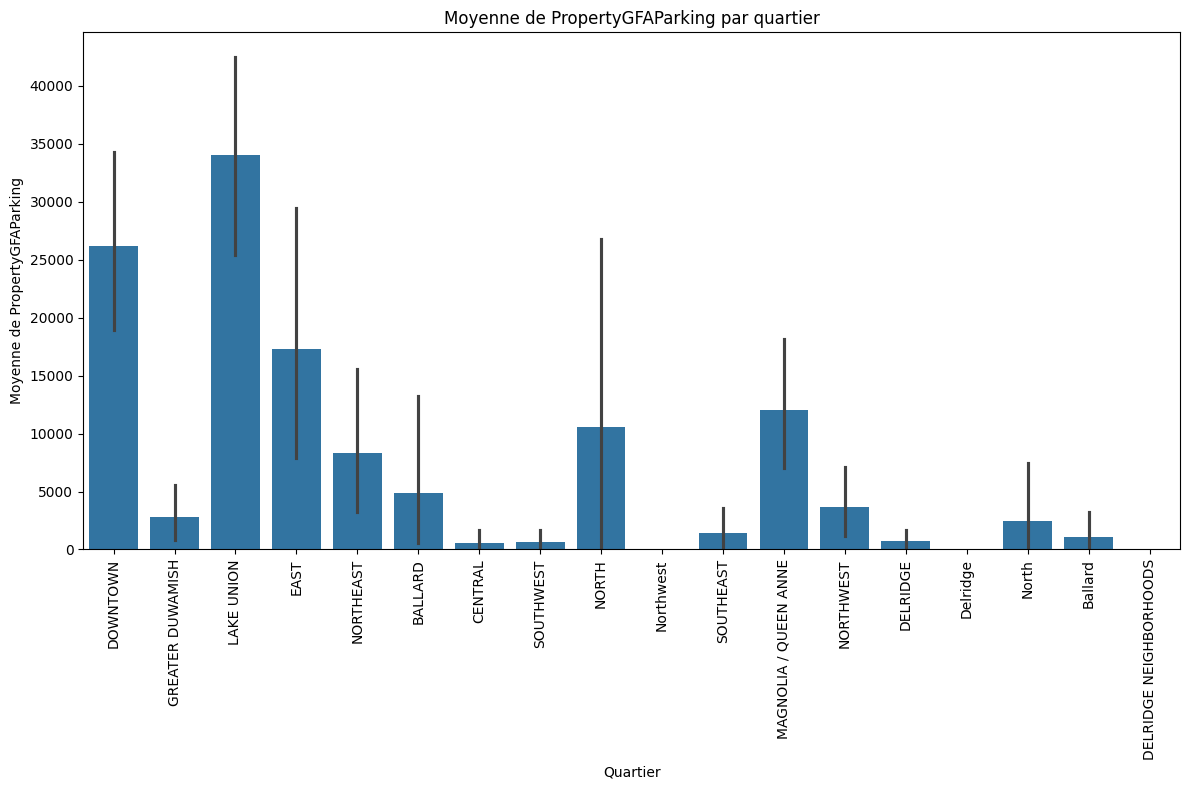

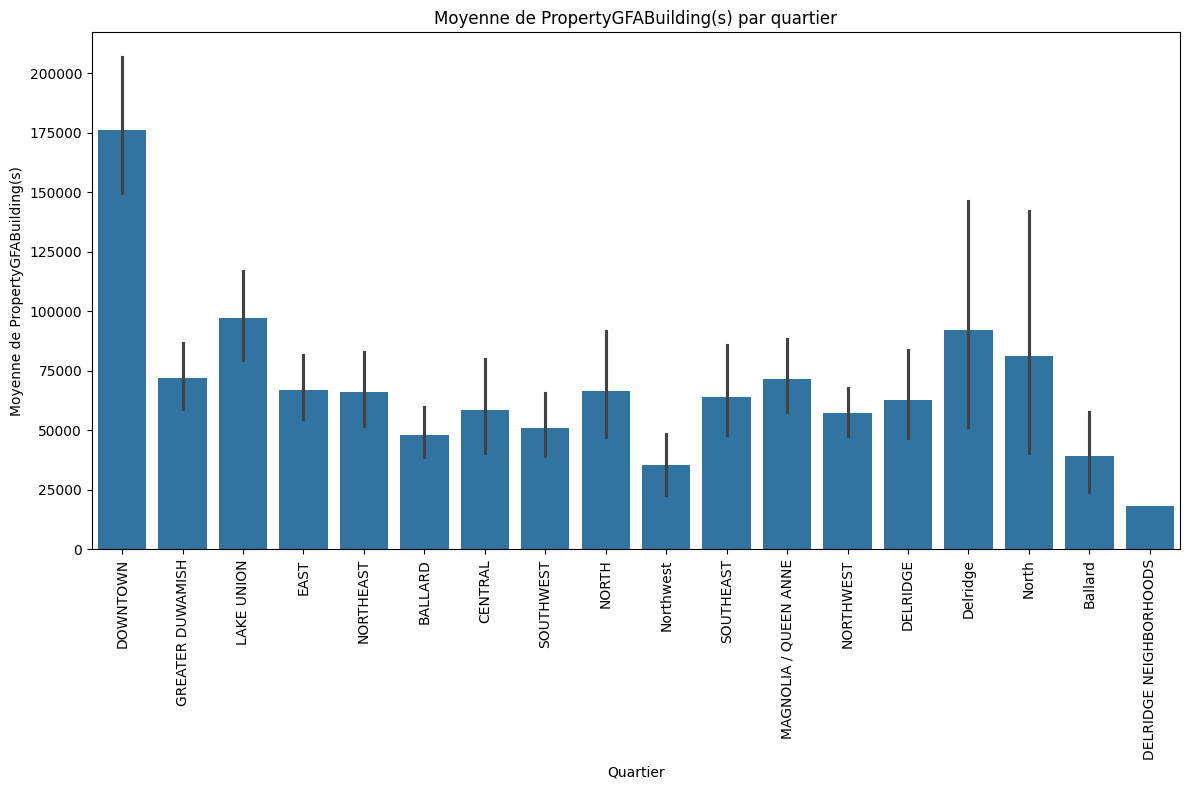

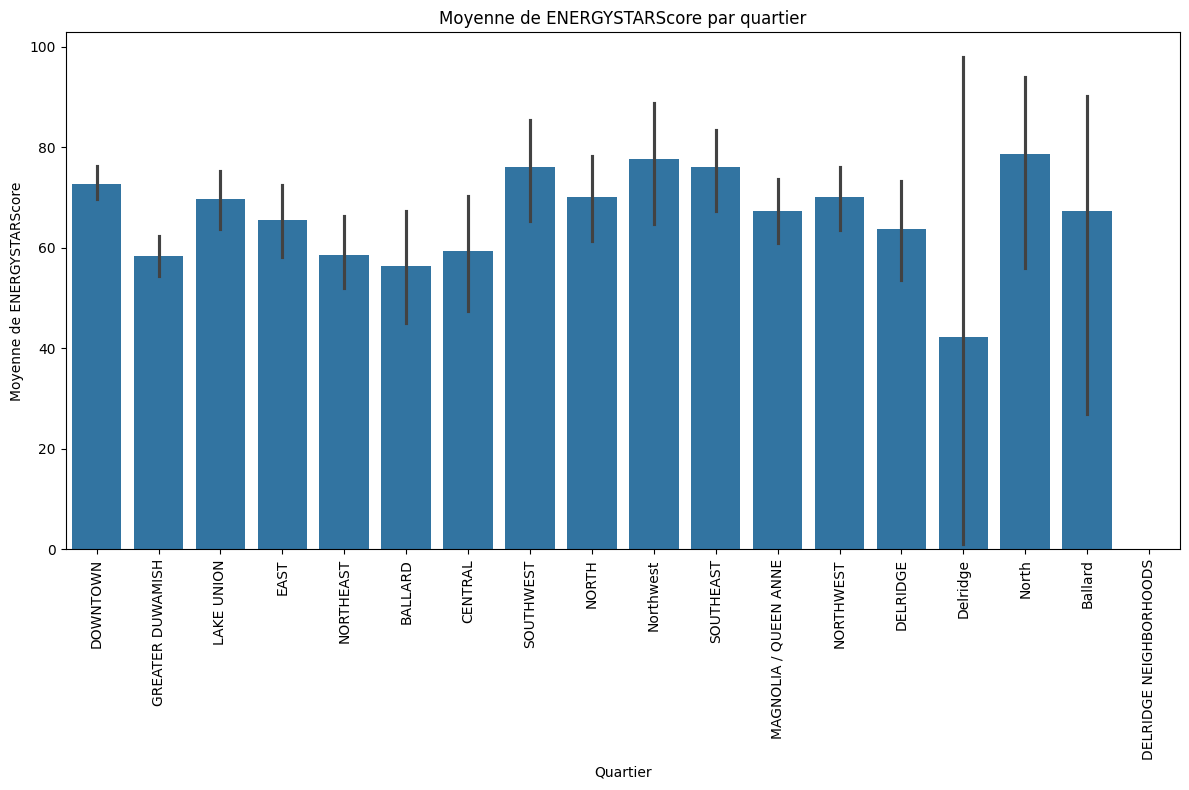

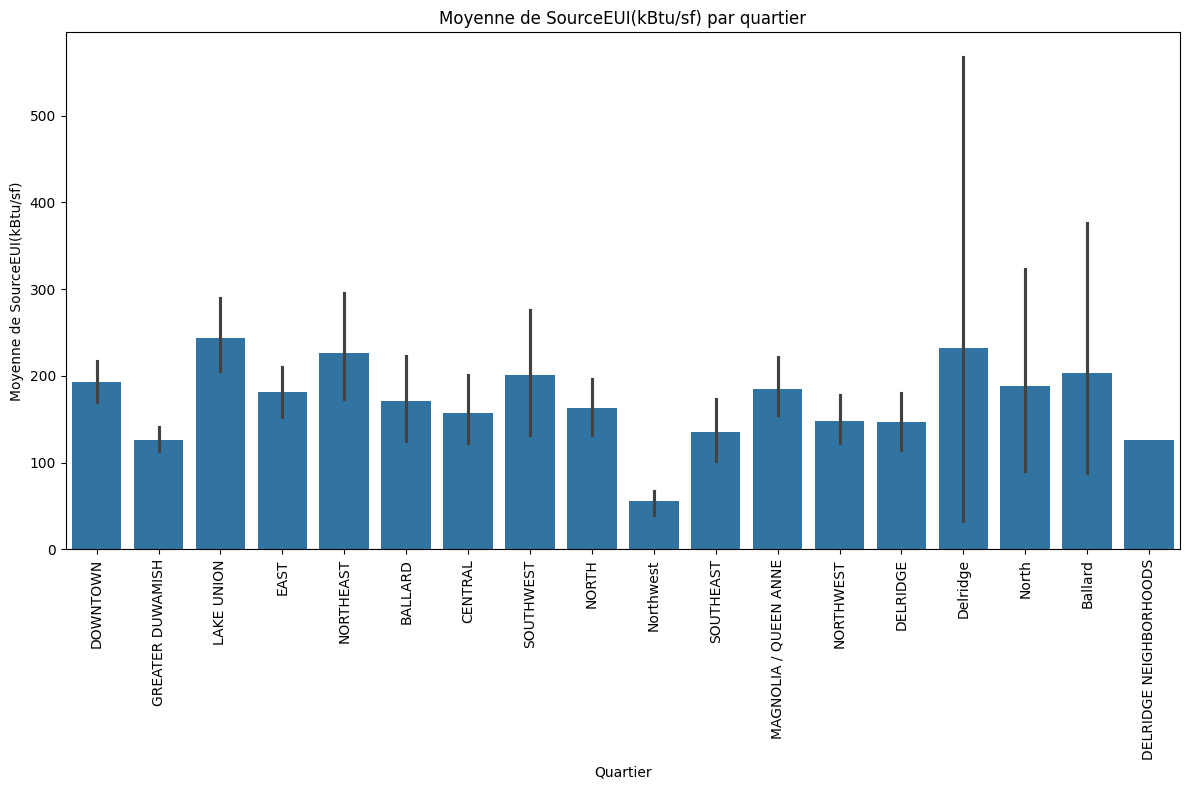

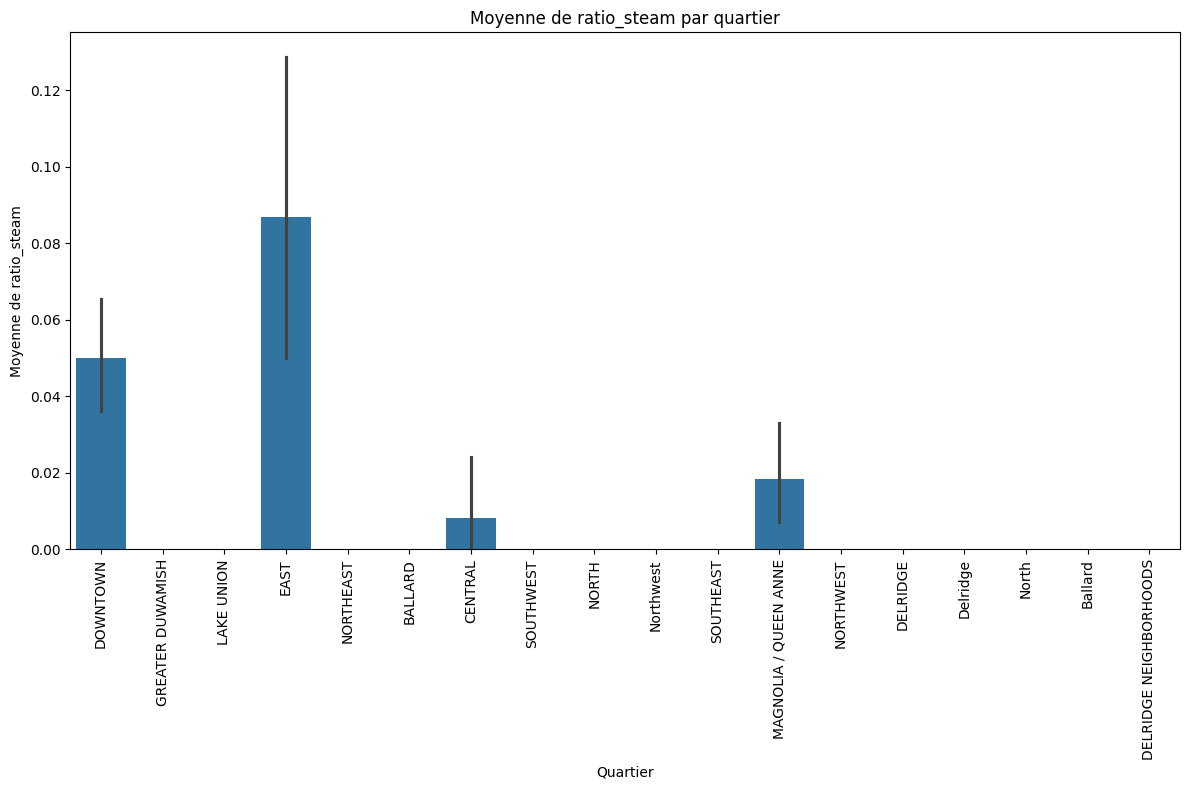

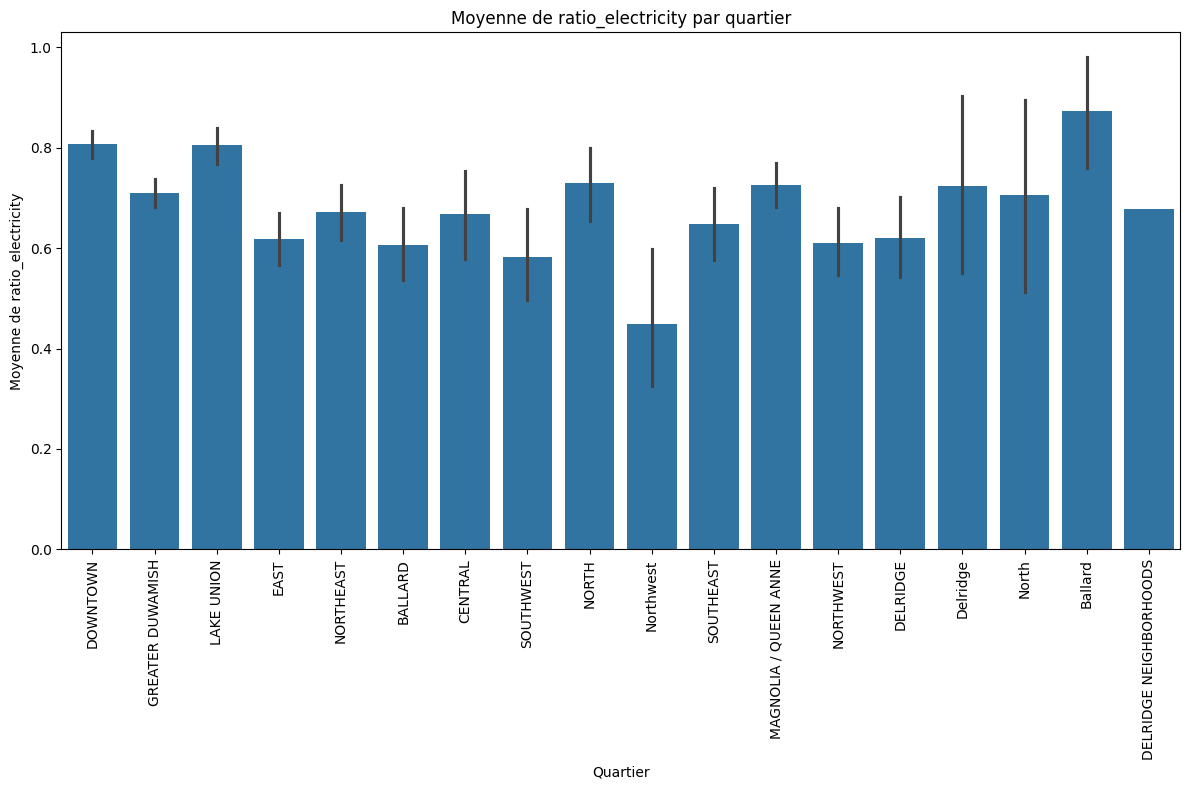

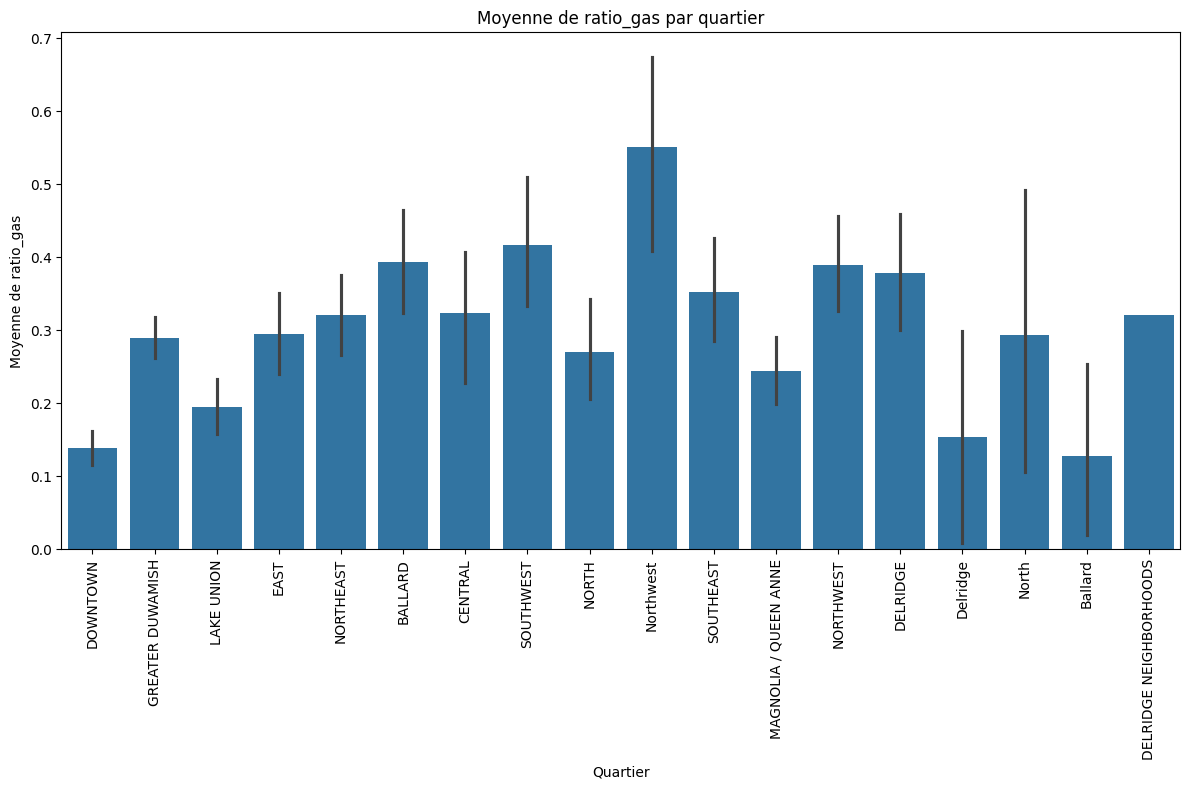

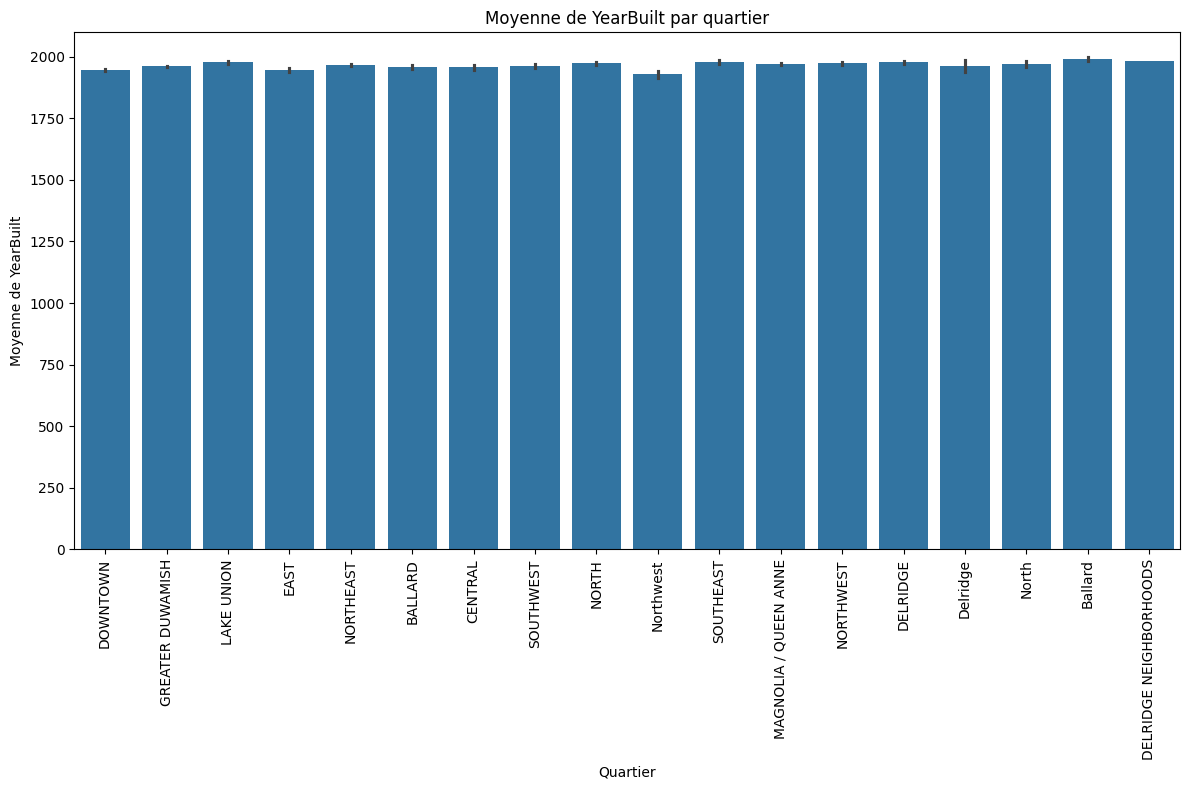

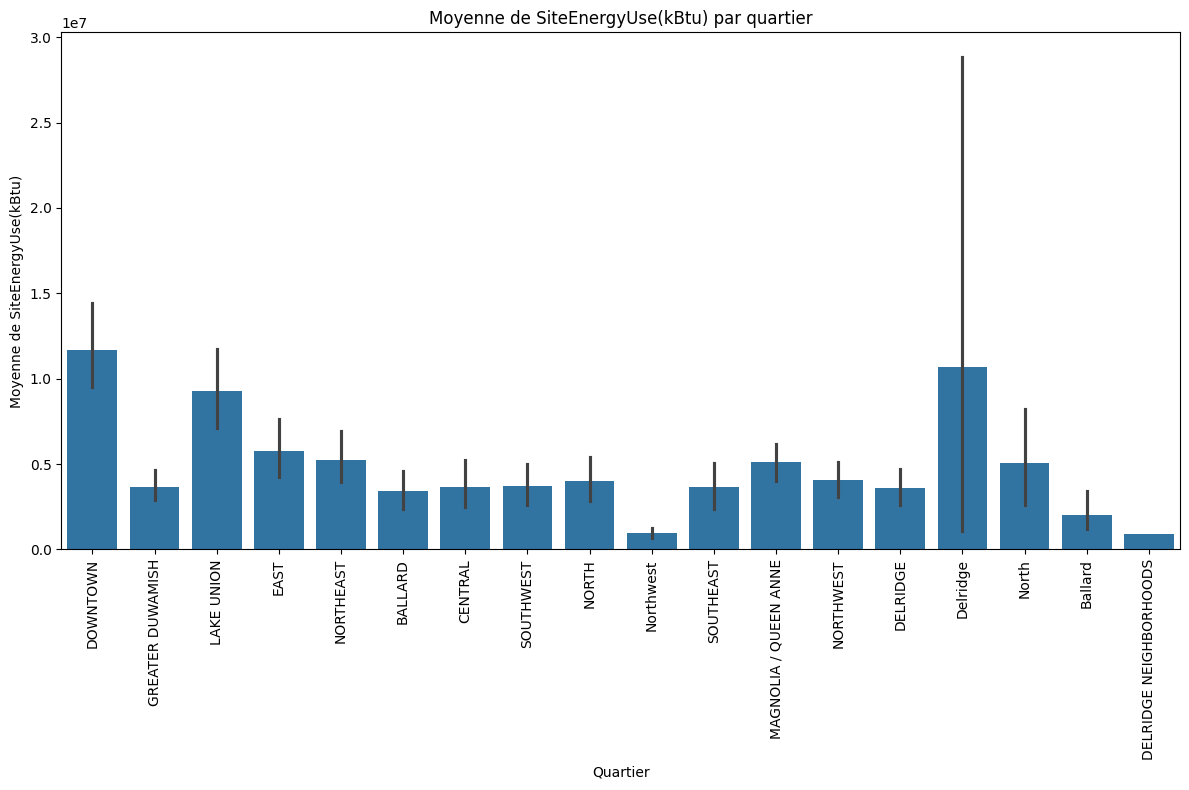

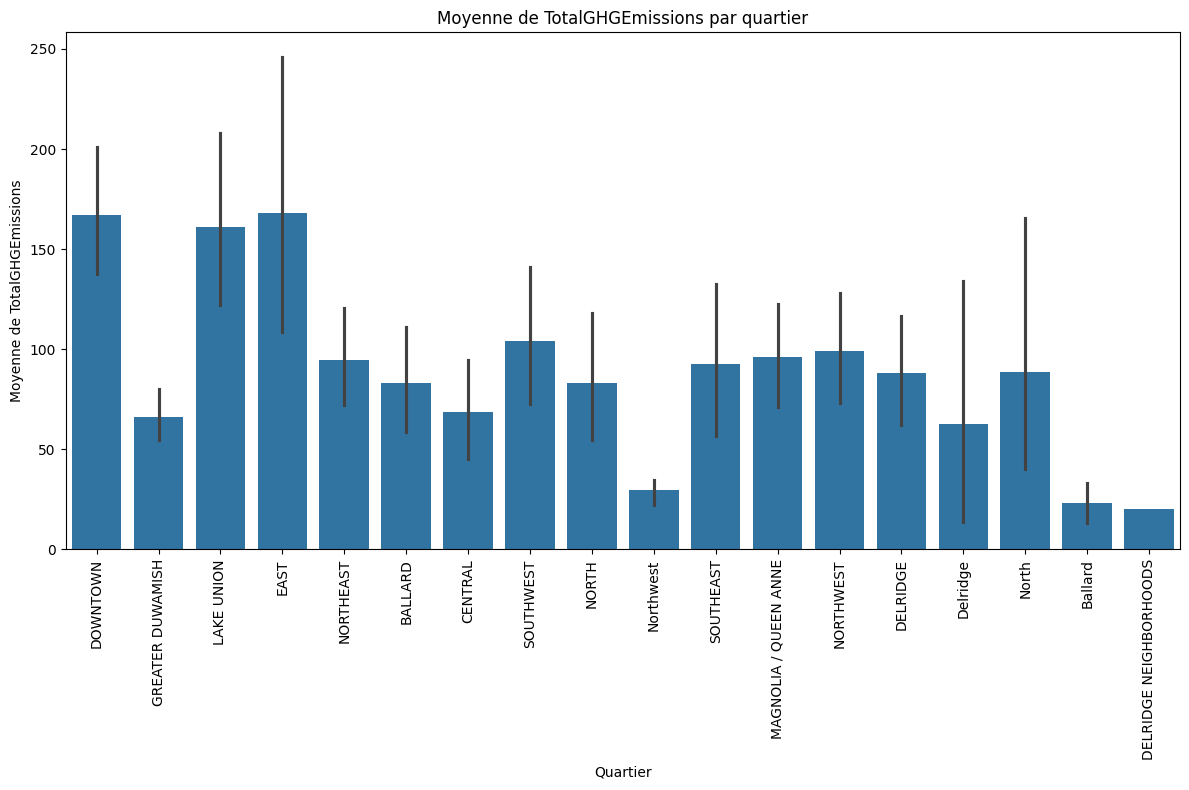

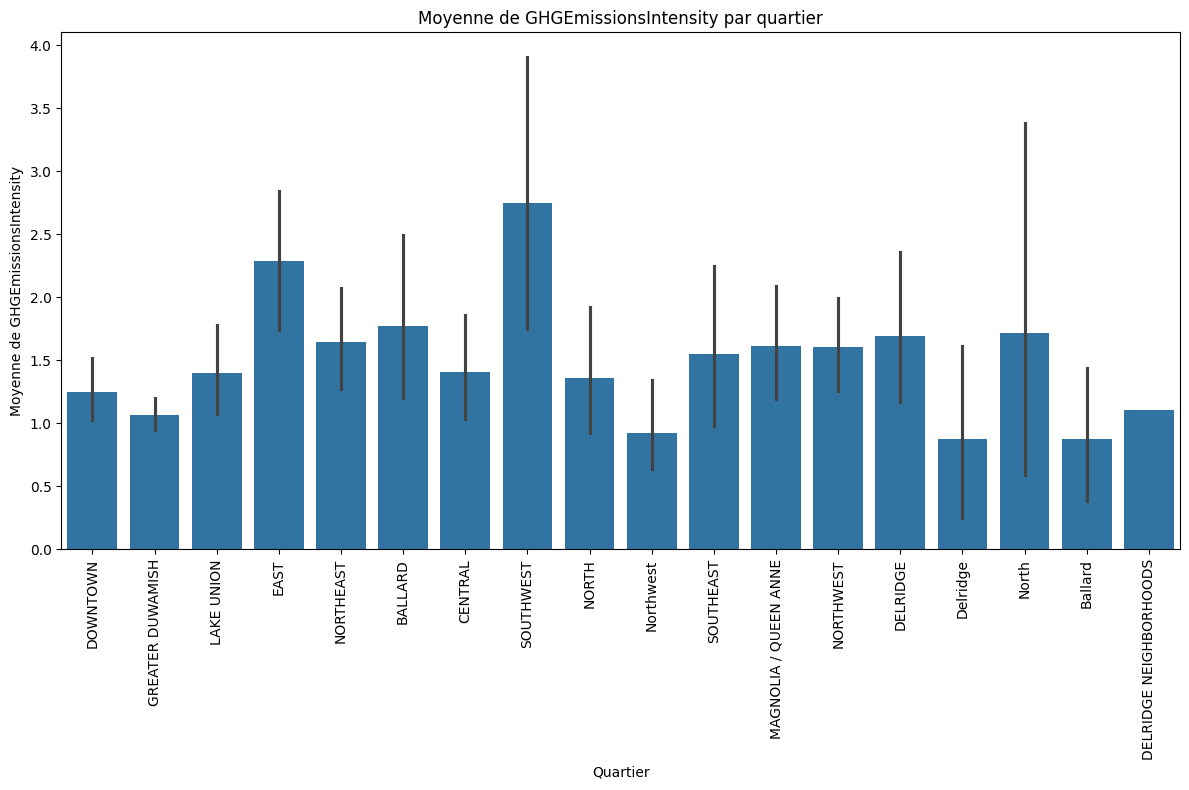

In [94]:
for quanti in liste_quanti:
    plt.figure(figsize=(12, 8))
    sns.barplot(data=building_consumption_clean, x='Neighborhood', y=quanti)
    plt.xticks(rotation=90)
    plt.title(f"Moyenne de {quanti} par quartier")
    plt.xlabel("Quartier")
    plt.ylabel(f"Moyenne de {quanti}")
    plt.tight_layout()  # Pour éviter que les éléments ne se chevauchent
    plt.show()

### Variables qualitatives

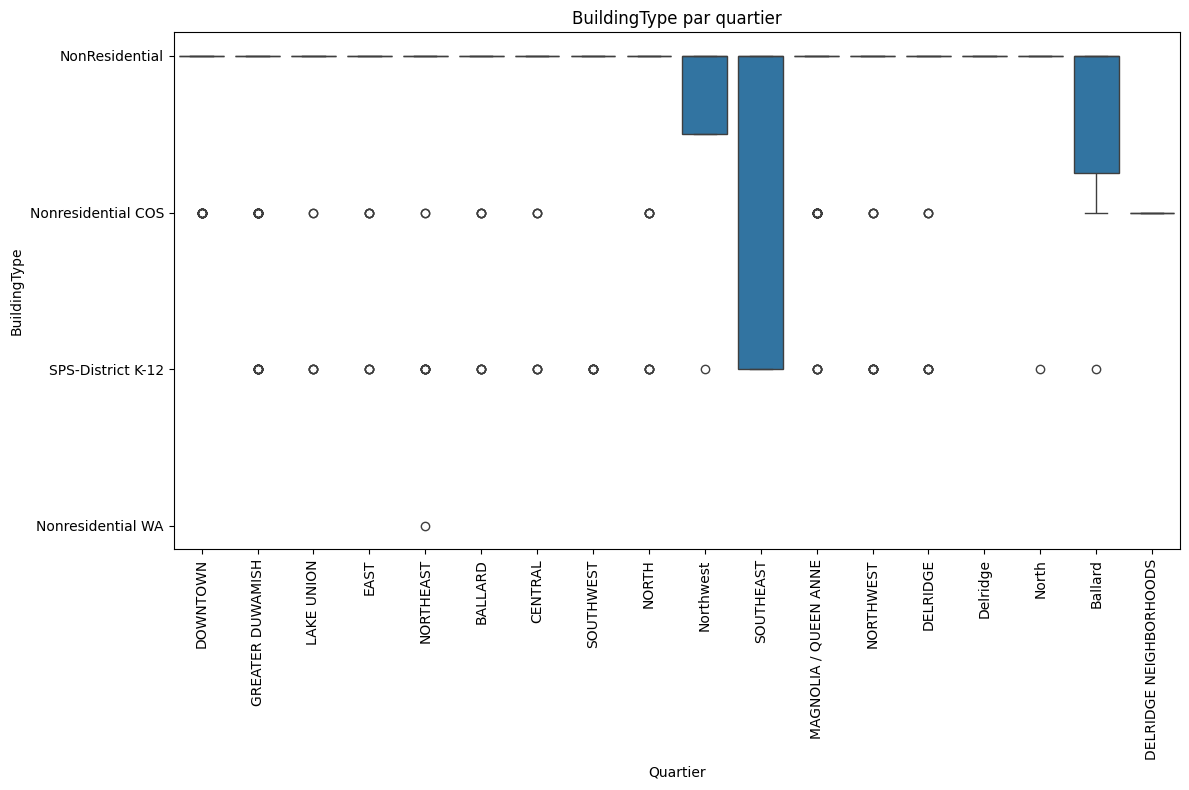

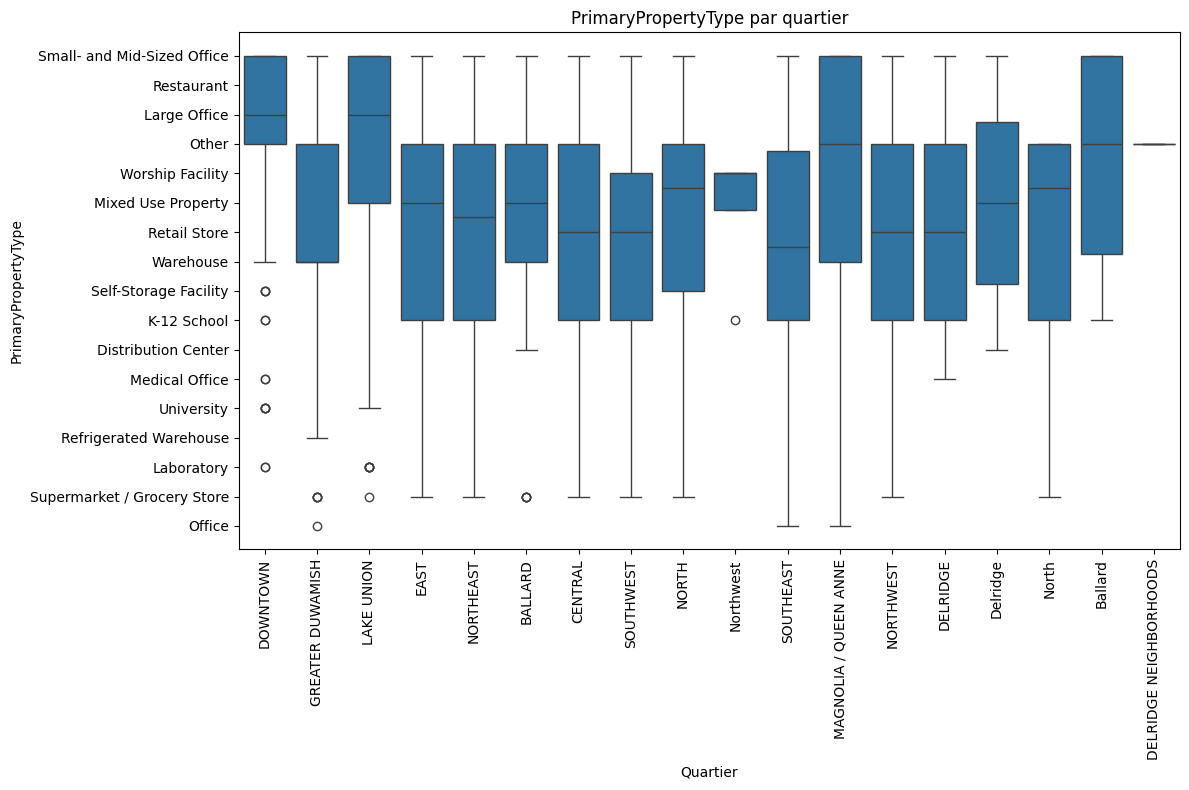

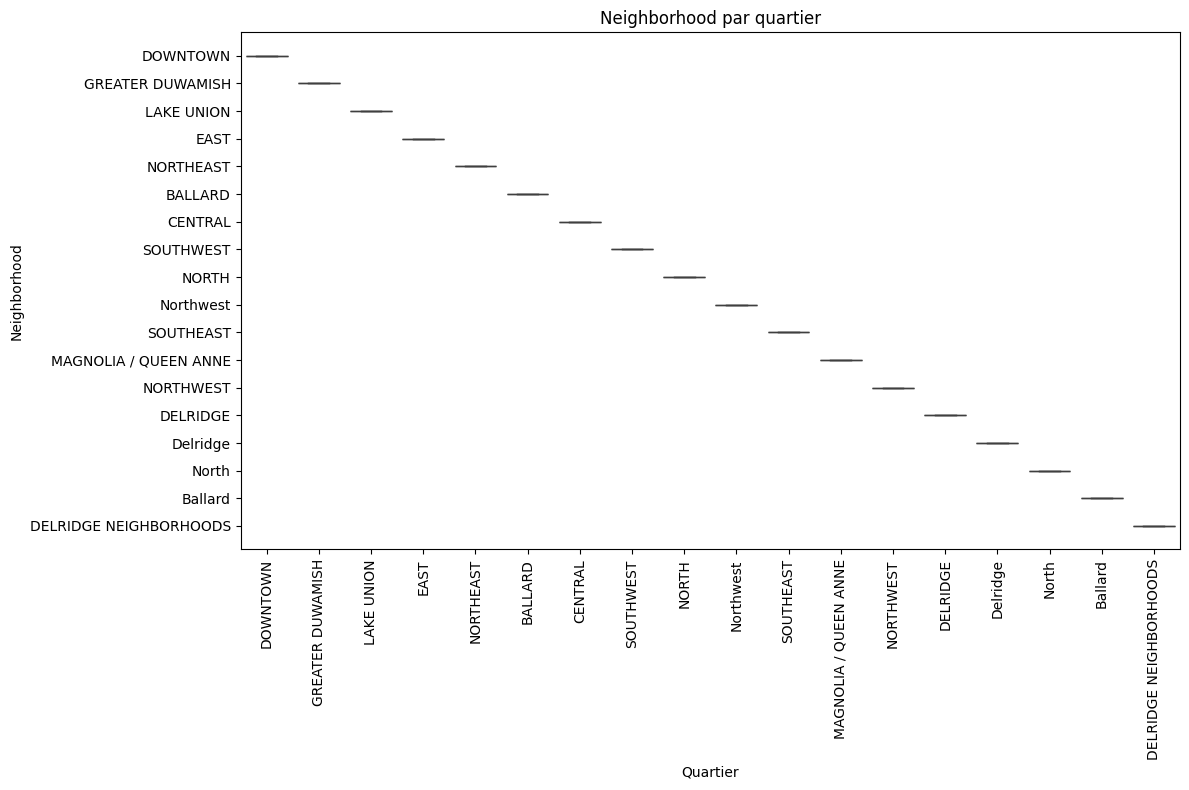

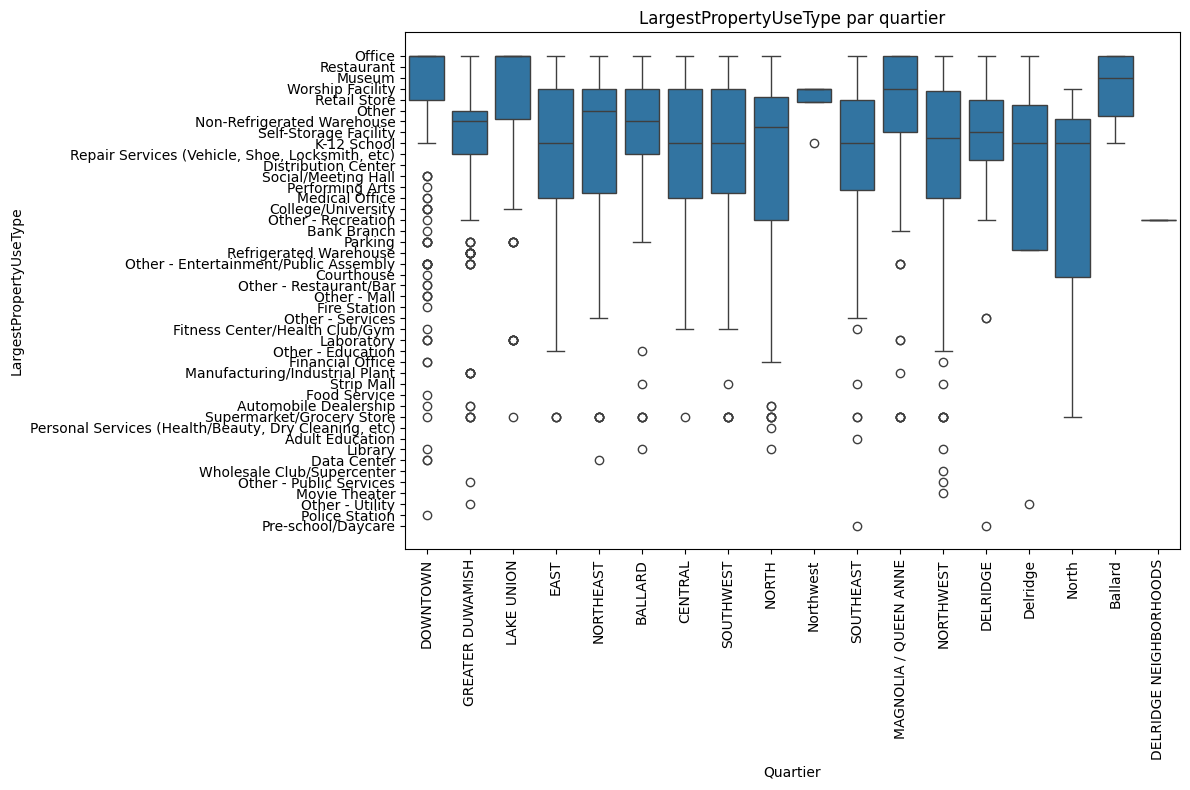

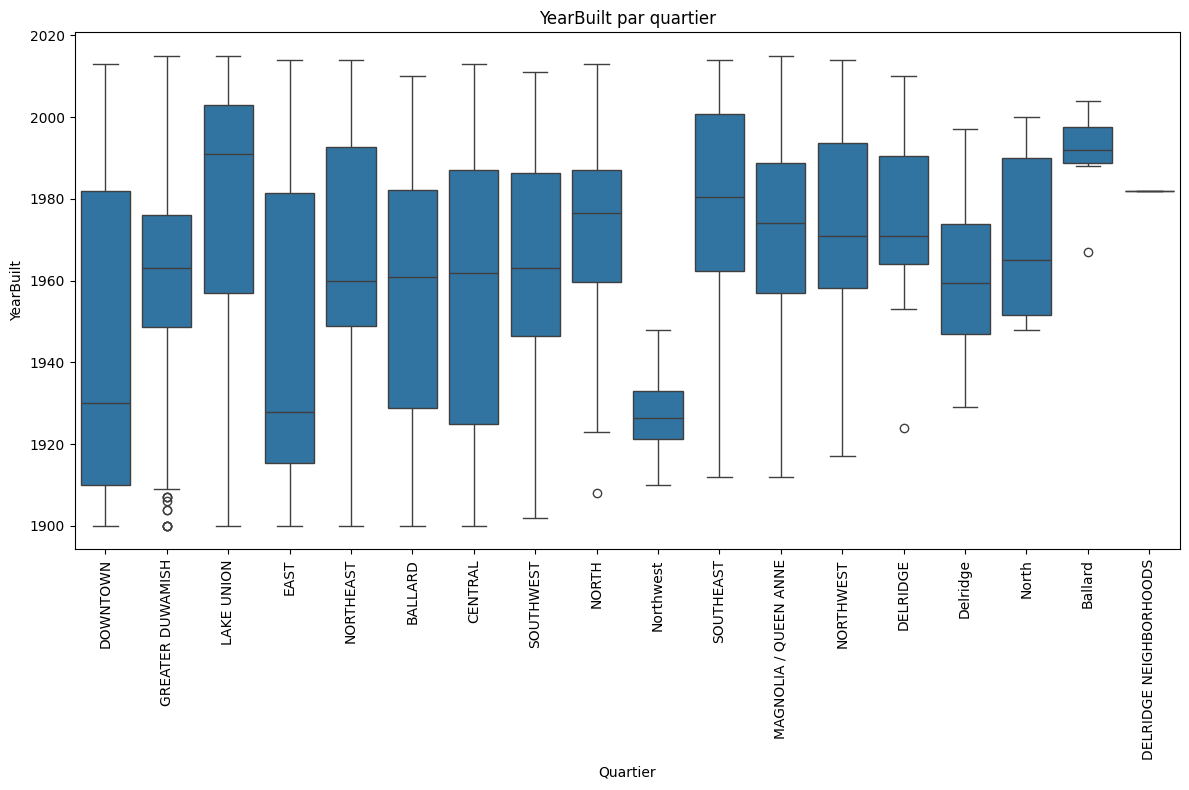

In [93]:
for quali in liste_quali:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=building_consumption_clean, x='Neighborhood', y=quali)
    plt.xticks(rotation=90)
    plt.title(f"{quali} par quartier")
    plt.xlabel("Quartier")
    plt.ylabel(f"{quali}")
    plt.tight_layout()  # Pour éviter que les éléments ne se chevauchent
    plt.show()

Le quartier Downtown se détache du lot en terme de surface et de nombre d'étages. Une variable de type booléen sur Downtown pourra être utile.

#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

# Modélisation 

### Import des modules 

In [ ]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

In [ ]:
# CODE FEATURE ENGINEERING

### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation.
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne.

In [ ]:
# CODE PREPARATION DES FEATURES

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [ ]:
# CODE COMPARAISON DES MODELES

### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn. 

In [ ]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE